pip install optuna (in terminal)

In [3]:
import optuna
import sklearn
import numpy as np
import matplotlib.pyplot as plt


Define the objective function 

In [4]:
xmin = -100
xmax = 100
ymin = -100
ymax = 100

#Change the function to be optimized here 
def func(x,y):
    return np.sin(x**2) - 3*y**2
    
def objective(trial):
    noise = 3*(np.random.rand(1) - 0.5)
    x = trial.suggest_float("x", xmin, xmax)
    y = trial.suggest_float("y", ymin, ymax)
    return -(func(x,y) + noise) #Optuna finds the minimum so add a negative to the function to find the maximum 

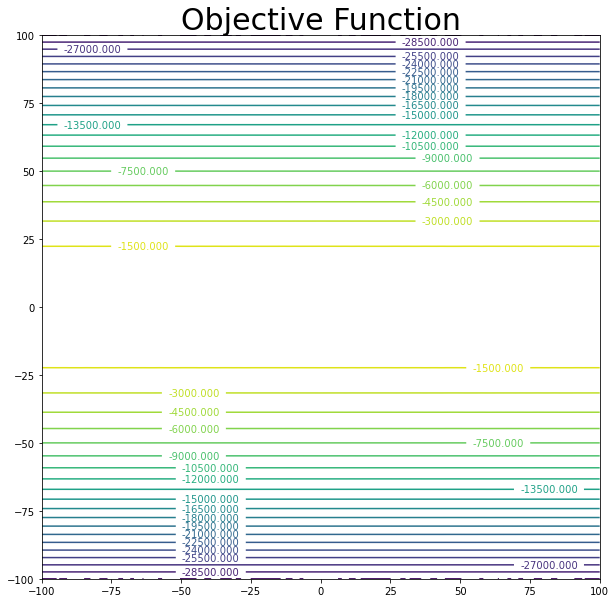

In [49]:
x = np.linspace(xmin,xmax,100)
y = np.linspace(ymin,ymax,100)
xx, yy = np.meshgrid(x,y)
z = func(xx,yy)
fig, ax = plt.subplots(figsize=(10,10))
cs = ax.contour(z, extent=(xmin,xmax,ymin,ymax), levels = 20)
ax.clabel(cs, inline=1, fontsize=10)
ax.set_title('Objective Function', fontsize = 30)
plt.show()
        

### Pick a type of sampler 
Tree-structured Parzen Estimator algorithm implemented in optuna.samplers.TPESampler

CMA-ES based algorithm implemented in optuna.samplers.CmaEsSampler

Grid Search implemented in optuna.samplers.GridSampler

Random Search implemented in optuna.samplers.RandomSampler

In [5]:
study = optuna.create_study()
study = optuna.create_study(sampler=optuna.samplers.RandomSampler())
study.optimize(objective, n_trials=50)

[I 2021-02-16 18:40:37,275] A new study created in memory with name: no-name-d0f060ae-345c-4ee7-8c21-2f98a78c7f0d
[I 2021-02-16 18:40:37,284] A new study created in memory with name: no-name-54a15b8a-0765-4660-973a-eb58649e6aaf
[I 2021-02-16 18:40:37,312] Trial 0 finished with value: -80.69713718526626 and parameters: {'x': -17.490946211512323, 'y': 93.40420380935723, 'z': 4.353956561020951}. Best is trial 0 with value: -80.69713718526626.
[I 2021-02-16 18:40:37,316] Trial 1 finished with value: 196.5978392560044 and parameters: {'x': -87.58051055400244, 'y': -99.6522772993037, 'z': -10.106195001935347}. Best is trial 0 with value: -80.69713718526626.
[I 2021-02-16 18:40:37,320] Trial 2 finished with value: -122.2413983675888 and parameters: {'x': 63.723360338068545, 'y': 79.59798477018603, 'z': -21.354467174629747}. Best is trial 2 with value: -122.2413983675888.
[I 2021-02-16 18:40:37,331] Trial 3 finished with value: -9.878791622349716 and parameters: {'x': -19.54147960905459, 'y': 

[I 2021-02-16 18:40:37,541] Trial 35 finished with value: 15.406940652668624 and parameters: {'x': 22.92748175594454, 'y': -88.32450036061809, 'z': 50.436247298864515}. Best is trial 2 with value: -122.2413983675888.
[I 2021-02-16 18:40:37,544] Trial 36 finished with value: -60.003957457896604 and parameters: {'x': 67.05630913647752, 'y': -45.90966338809608, 'z': 38.56323333750893}. Best is trial 2 with value: -122.2413983675888.
[I 2021-02-16 18:40:37,547] Trial 37 finished with value: 179.41392459501557 and parameters: {'x': -34.40202861088473, 'y': -84.40561439211649, 'z': -61.41397438005911}. Best is trial 2 with value: -122.2413983675888.
[I 2021-02-16 18:40:37,553] Trial 38 finished with value: 125.4167890291338 and parameters: {'x': 47.53979450751683, 'y': -78.70969276282263, 'z': -94.17101446411993}. Best is trial 2 with value: -122.2413983675888.
[I 2021-02-16 18:40:37,562] Trial 39 finished with value: -44.63443931849064 and parameters: {'x': 45.62625938566205, 'y': 56.292522

### Extract the Best Parameters

In [6]:
best_params = study.best_params
found_x = best_params["x"]
found_y = best_params["y"]
print("Found x: {}, f: {}".format(found_x, (func(found_x, found_y))))
print("Found y: {}, f: {}".format(found_y, (func(found_x, found_y))))

Found x: 82.45996166668485, f: 269.23075879494576
Found y: 89.21209638855407, f: 269.23075879494576
Found z: 97.55870073970684, f: 269.23075879494576


In [24]:
print(f"Sampler is {study.sampler.__class__.__name__}")

Sampler is TPESampler


### Create a loop to repeat the optimizer i times and extract the maximum value found in each trial 

In [7]:
x = []
y = []
z = []
for i in range(100):    
    study = optuna.create_study()
    study = optuna.create_study(sampler=optuna.samplers.CmaEsSampler())
    study.optimize(objective, n_trials=30)
    best_params = study.best_params
    found_x = best_params["x"]
    found_y = best_params["y"]
    print("Found x: {}, (x - 2)^2: {}".format(found_x, (func(found_x, found_y))))
    print("Found y: {}, (x - 2)^2: {}".format(found_y, (func(found_x, found_y))))
    x.append(found_x)
    y.append(found_y)
    z.append(func(found_x, found_y))
    if i%10 == 0:
        print(i)
    else:
        pass
    

[I 2021-02-16 18:42:15,782] A new study created in memory with name: no-name-e9cd5d59-2260-435e-9b3e-7a1d70ffb9c3
[I 2021-02-16 18:42:15,787] A new study created in memory with name: no-name-cbf37211-0ecc-4f3f-afac-94e7aa4ca566
[I 2021-02-16 18:42:15,790] Trial 0 finished with value: 110.21593161139896 and parameters: {'x': -74.77291126906238, 'y': -92.47047226646876, 'z': 58.37698167464083}. Best is trial 0 with value: 110.21593161139896.
[I 2021-02-16 18:42:15,827] Trial 1 finished with value: -11.269979551806374 and parameters: {'x': 38.5091411224578, 'y': -10.761783908329736, 'z': -17.588021755776833}. Best is trial 1 with value: -11.269979551806374.
[I 2021-02-16 18:42:15,832] Trial 2 finished with value: -13.995109747050117 and parameters: {'x': 25.130831352204485, 'y': -2.256760390057347, 'z': -9.497830921332117}. Best is trial 2 with value: -13.995109747050117.
[I 2021-02-16 18:42:15,845] Trial 3 finished with value: 25.051264678374203 and parameters: {'x': 0.29003810379438283,

[I 2021-02-16 18:42:16,147] Trial 4 finished with value: 39.24866781690817 and parameters: {'x': 43.74715871249178, 'y': -27.396917757802033, 'z': -54.74518615385534}. Best is trial 1 with value: -76.60911368636445.
[I 2021-02-16 18:42:16,152] Trial 5 finished with value: -62.04790084858594 and parameters: {'x': 35.812946571441785, 'y': 48.879316431624424, 'z': -23.615102623834336}. Best is trial 1 with value: -76.60911368636445.
[I 2021-02-16 18:42:16,160] Trial 6 finished with value: -8.805402514039864 and parameters: {'x': 3.8459700864395034, 'y': -8.178268876726838, 'z': 13.895319696555982}. Best is trial 1 with value: -76.60911368636445.
[I 2021-02-16 18:42:16,167] Trial 7 finished with value: -9.622675567647114 and parameters: {'x': 6.403692603092322, 'y': -5.617976001260706, 'z': 8.84776618131913}. Best is trial 1 with value: -76.60911368636445.
[I 2021-02-16 18:42:16,180] Trial 8 finished with value: -47.33843704871347 and parameters: {'x': -20.802447977761116, 'y': 45.15899252

Found x: 26.29152274071377, (x - 2)^2: 223.6184624596682
Found y: 99.7682389792476, (x - 2)^2: 223.6184624596682
0


[I 2021-02-16 18:42:16,315] Trial 27 finished with value: -79.42075315880294 and parameters: {'x': 49.08049343932609, 'y': 16.10570919847315, 'z': 13.851550864366752}. Best is trial 24 with value: -171.4206781546759.
[I 2021-02-16 18:42:16,322] Trial 28 finished with value: -68.73462178889729 and parameters: {'x': 1.4251202054030045, 'y': 96.45518392171685, 'z': -28.125478001069016}. Best is trial 24 with value: -171.4206781546759.
[I 2021-02-16 18:42:16,334] Trial 29 finished with value: -142.97630394150372 and parameters: {'x': 53.36484051541464, 'y': 42.873454158802545, 'z': 47.8357662191203}. Best is trial 24 with value: -171.4206781546759.
[I 2021-02-16 18:42:16,337] A new study created in memory with name: no-name-bb188b29-5f07-4070-991a-4071420d11bd
[I 2021-02-16 18:42:16,341] A new study created in memory with name: no-name-c3022600-30e8-4dc5-8e87-87a4fc2ab348
[I 2021-02-16 18:42:16,345] Trial 0 finished with value: 61.771681262108224 and parameters: {'x': -17.383472870499816, 

Found x: 97.2195870246805, (x - 2)^2: 272.95140470064075
Found y: 78.17311693625341, (x - 2)^2: 272.95140470064075


[I 2021-02-16 18:42:16,538] Trial 24 finished with value: -149.82174406564067 and parameters: {'x': 68.99760744457926, 'y': 5.011990638806793, 'z': 74.3651935906859}. Best is trial 21 with value: -187.25883253846573.
[I 2021-02-16 18:42:16,548] Trial 25 finished with value: -98.48762216018164 and parameters: {'x': 69.12097441369048, 'y': 82.36360122663524, 'z': -51.977011989734514}. Best is trial 21 with value: -187.25883253846573.
[I 2021-02-16 18:42:16,555] Trial 26 finished with value: -191.58143939456696 and parameters: {'x': 65.7662932252631, 'y': 82.82243276835443, 'z': 42.45204554327213}. Best is trial 26 with value: -191.58143939456696.
[I 2021-02-16 18:42:16,565] Trial 27 finished with value: -169.95451340413348 and parameters: {'x': 45.47113728382112, 'y': 66.5856270157072, 'z': 57.955237976937156}. Best is trial 26 with value: -191.58143939456696.
[I 2021-02-16 18:42:16,572] Trial 28 finished with value: -81.84704679565334 and parameters: {'x': 61.66539282307198, 'y': 64.843

Found x: 82.9653586139422, (x - 2)^2: 249.6838943299634
Found y: 69.15983497631437, (x - 2)^2: 249.6838943299634


[I 2021-02-16 18:42:16,786] Trial 17 finished with value: -122.53882746695263 and parameters: {'x': 19.340779465317425, 'y': 33.68594898436859, 'z': 68.38089056896939}. Best is trial 11 with value: -162.44867184699584.
[I 2021-02-16 18:42:16,794] Trial 18 finished with value: -153.7034172814806 and parameters: {'x': 79.37099023455289, 'y': 22.662430850670887, 'z': 51.97320012875559}. Best is trial 11 with value: -162.44867184699584.
[I 2021-02-16 18:42:16,802] Trial 19 finished with value: -89.4667809091499 and parameters: {'x': 10.990911383320729, 'y': 62.129692374950906, 'z': 15.325097527841905}. Best is trial 11 with value: -162.44867184699584.
[I 2021-02-16 18:42:16,806] Trial 20 finished with value: -168.11956603522933 and parameters: {'x': 90.48643811182842, 'y': 16.66086267235027, 'z': 61.20288344964657}. Best is trial 20 with value: -168.11956603522933.
[I 2021-02-16 18:42:16,814] Trial 21 finished with value: -57.15572782923173 and parameters: {'x': 35.96537583132415, 'y': -15

Found x: 46.789286029091, (x - 2)^2: 223.2068805343176
Found y: 78.85889376551977, (x - 2)^2: 223.2068805343176


[I 2021-02-16 18:42:17,102] Trial 21 finished with value: -84.61972190859528 and parameters: {'x': 11.740801687373004, 'y': 72.26394041601682, 'z': 1.2112178659487398}. Best is trial 7 with value: -139.9178731971899.
[I 2021-02-16 18:42:17,114] Trial 22 finished with value: -17.56550652372272 and parameters: {'x': 2.2070662819077995, 'y': -25.824152843693696, 'z': 42.10569492809872}. Best is trial 7 with value: -139.9178731971899.
[I 2021-02-16 18:42:17,124] Trial 23 finished with value: -67.86126198583696 and parameters: {'x': -9.806404641639276, 'y': 62.85682005990035, 'z': 16.023927090996303}. Best is trial 7 with value: -139.9178731971899.
[I 2021-02-16 18:42:17,138] Trial 24 finished with value: -64.89919368315479 and parameters: {'x': 14.344100339816546, 'y': 28.235606706134813, 'z': 23.63944872021527}. Best is trial 7 with value: -139.9178731971899.
[I 2021-02-16 18:42:17,154] Trial 25 finished with value: -133.20466106830918 and parameters: {'x': 17.188913162924536, 'y': 71.442

Found x: 3.1498581552299934, (x - 2)^2: 160.60886465857783
Found y: 59.90030576364099, (x - 2)^2: 160.60886465857783


[I 2021-02-16 18:42:17,410] Trial 26 finished with value: -55.83452559189796 and parameters: {'x': 25.280661813559586, 'y': -2.824540176070599, 'z': 34.043418785768104}. Best is trial 22 with value: -196.11517501318724.
[I 2021-02-16 18:42:17,415] Trial 27 finished with value: -17.59050220812547 and parameters: {'x': 22.834198363330415, 'y': -15.619546658356498, 'z': 10.816952272007217}. Best is trial 22 with value: -196.11517501318724.
[I 2021-02-16 18:42:17,420] Trial 28 finished with value: -150.27283284995227 and parameters: {'x': 82.10442208765936, 'y': 81.23205185188252, 'z': -14.517593442224424}. Best is trial 22 with value: -196.11517501318724.
[I 2021-02-16 18:42:17,429] Trial 29 finished with value: -197.0775022798581 and parameters: {'x': 70.31552515546318, 'y': 77.41928180927557, 'z': 50.66994873185435}. Best is trial 29 with value: -197.0775022798581.
[I 2021-02-16 18:42:17,433] A new study created in memory with name: no-name-f833c985-33fc-4e40-826e-cd358a03fde7
[I 2021-0

[I 2021-02-16 18:42:17,624] A new study created in memory with name: no-name-59e68272-2602-4feb-980e-7c3c8b23363d
[I 2021-02-16 18:42:17,627] Trial 0 finished with value: -95.85862759688477 and parameters: {'x': 81.22511659209206, 'y': 35.67877952321794, 'z': -21.659048104386727}. Best is trial 0 with value: -95.85862759688477.
[I 2021-02-16 18:42:17,632] Trial 1 finished with value: -50.914941494672355 and parameters: {'x': 7.554098775560874, 'y': 9.067103084417909, 'z': 34.520712731151086}. Best is trial 0 with value: -95.85862759688477.


Found x: 70.31552515546318, (x - 2)^2: 245.2935077044456
Found y: 77.41928180927557, (x - 2)^2: 245.2935077044456
Found x: 16.382554508482947, (x - 2)^2: 177.90507896114767
Found y: 63.963823712957876, (x - 2)^2: 177.90507896114767


[I 2021-02-16 18:42:17,637] Trial 2 finished with value: -6.1157180976626595 and parameters: {'x': 12.214415076928232, 'y': 56.96747777063724, 'z': -62.132985112888534}. Best is trial 0 with value: -95.85862759688477.
[I 2021-02-16 18:42:17,647] Trial 3 finished with value: 2.99232050435716 and parameters: {'x': -30.511334681890578, 'y': 49.6114269443192, 'z': -23.475094294046656}. Best is trial 0 with value: -95.85862759688477.
[I 2021-02-16 18:42:17,663] Trial 4 finished with value: 45.1033007040795 and parameters: {'x': 9.808360643392493, 'y': -18.13080683035244, 'z': -35.59098037553959}. Best is trial 0 with value: -95.85862759688477.
[I 2021-02-16 18:42:17,681] Trial 5 finished with value: -4.863119618753683 and parameters: {'x': -55.01085240002603, 'y': 60.94409093287796, 'z': -1.0386571790752825}. Best is trial 0 with value: -95.85862759688477.
[I 2021-02-16 18:42:17,689] Trial 6 finished with value: 11.707298864320311 and parameters: {'x': 48.93484193471029, 'y': -32.9731390599

[I 2021-02-16 18:42:17,978] Trial 7 finished with value: -38.52568462791701 and parameters: {'x': -3.5943769370877714, 'y': 1.7702479681963872, 'z': 41.26726175953571}. Best is trial 6 with value: -123.86940084791746.
[I 2021-02-16 18:42:17,992] Trial 8 finished with value: -115.29443223613859 and parameters: {'x': 81.79397531818536, 'y': 24.126526879840444, 'z': 10.720323971615562}. Best is trial 6 with value: -123.86940084791746.
[I 2021-02-16 18:42:17,997] Trial 9 finished with value: -34.851734300284 and parameters: {'x': 16.91189795832593, 'y': -2.717657363014613, 'z': 19.503994317765187}. Best is trial 6 with value: -123.86940084791746.
[I 2021-02-16 18:42:18,003] Trial 10 finished with value: -77.88346896164153 and parameters: {'x': 24.170392777309132, 'y': 2.1698788553461483, 'z': 52.35448593254073}. Best is trial 6 with value: -123.86940084791746.
[I 2021-02-16 18:42:18,010] Trial 11 finished with value: -80.73386782343714 and parameters: {'x': 53.653412641531006, 'y': 23.3045

Found x: 99.91015490378828, (x - 2)^2: 229.43083065080148
Found y: 31.961975007306357, (x - 2)^2: 229.43083065080148


[I 2021-02-16 18:42:18,112] Trial 25 finished with value: -204.76922642159133 and parameters: {'x': 72.07773058104762, 'y': 73.44570742371556, 'z': 60.34429915307051}. Best is trial 25 with value: -204.76922642159133.
[I 2021-02-16 18:42:18,117] Trial 26 finished with value: -116.6712518950674 and parameters: {'x': 33.38825611971725, 'y': 90.17815311327209, 'z': -6.592444446862572}. Best is trial 25 with value: -204.76922642159133.
[I 2021-02-16 18:42:18,125] Trial 27 finished with value: -135.82397030337566 and parameters: {'x': 81.20593628374706, 'y': 7.276889176751951, 'z': 46.98940497235265}. Best is trial 25 with value: -204.76922642159133.
[I 2021-02-16 18:42:18,132] Trial 28 finished with value: -233.85948299344724 and parameters: {'x': 75.69693697257341, 'y': 72.92740002033298, 'z': 85.90257684309464}. Best is trial 28 with value: -233.85948299344724.
[I 2021-02-16 18:42:18,141] Trial 29 finished with value: -159.98298396947717 and parameters: {'x': 33.798544341833995, 'y': 45.

Found x: 75.69693697257341, (x - 2)^2: 246.18303773261323
Found y: 72.92740002033298, (x - 2)^2: 246.18303773261323


[I 2021-02-16 18:42:18,348] Trial 27 finished with value: -188.67738565302594 and parameters: {'x': 40.87270714982296, 'y': 98.68726610318062, 'z': 49.266674194931035}. Best is trial 18 with value: -222.8178286030461.
[I 2021-02-16 18:42:18,355] Trial 28 finished with value: -134.74566052488402 and parameters: {'x': 71.78894015865461, 'y': 53.42927770779109, 'z': 10.421485167040736}. Best is trial 18 with value: -222.8178286030461.
[I 2021-02-16 18:42:18,365] Trial 29 finished with value: -125.04114585485196 and parameters: {'x': 88.31758525781908, 'y': 29.890147725347866, 'z': 7.179570823640844}. Best is trial 18 with value: -222.8178286030461.
[I 2021-02-16 18:42:18,370] A new study created in memory with name: no-name-ea9c94ba-162b-4dd9-86fd-9cb44301235f
[I 2021-02-16 18:42:18,374] A new study created in memory with name: no-name-c8226e53-f012-453a-a92c-46a8754c61e8
[I 2021-02-16 18:42:18,377] Trial 0 finished with value: -147.70862313155808 and parameters: {'x': 41.70054753947693, 

Found x: 84.24623742168238, (x - 2)^2: 234.85641862781662
Found y: 53.0514804664274, (x - 2)^2: 234.85641862781662


[I 2021-02-16 18:42:18,571] A new study created in memory with name: no-name-4d4242b4-4ab8-4030-8002-657b8d9efd05
[I 2021-02-16 18:42:18,578] A new study created in memory with name: no-name-5b715f55-2bda-4f88-954d-f192a46e8813
[I 2021-02-16 18:42:18,581] Trial 0 finished with value: 37.20375814980746 and parameters: {'x': -77.97443902215906, 'y': -43.922747629459245, 'z': 83.91894227401599}. Best is trial 0 with value: 37.20375814980746.
[I 2021-02-16 18:42:18,587] Trial 1 finished with value: 137.17250862846115 and parameters: {'x': -5.577038035711179, 'y': -80.89906639126038, 'z': -51.94205635720173}. Best is trial 0 with value: 37.20375814980746.
[I 2021-02-16 18:42:18,596] Trial 2 finished with value: -79.92169118057306 and parameters: {'x': 55.01587768595345, 'y': 11.81037953371844, 'z': 12.025544783340385}. Best is trial 2 with value: -79.92169118057306.
[I 2021-02-16 18:42:18,615] Trial 3 finished with value: -23.758157745077288 and parameters: {'x': -31.827502130740783, 'y': 4

Found x: 88.91163085170463, (x - 2)^2: 285.16718786508983
Found y: 98.69685627367836, (x - 2)^2: 285.16718786508983
10


[I 2021-02-16 18:42:18,774] Trial 22 finished with value: -55.15404794047811 and parameters: {'x': 0.6476312318476403, 'y': 36.759227386792325, 'z': 18.0704580192878}. Best is trial 20 with value: -198.24779670060906.
[I 2021-02-16 18:42:18,780] Trial 23 finished with value: -80.64758170771391 and parameters: {'x': 39.745380624928906, 'y': 44.00360907033526, 'z': -2.4312062140094}. Best is trial 20 with value: -198.24779670060906.
[I 2021-02-16 18:42:18,791] Trial 24 finished with value: -186.84885780789187 and parameters: {'x': 49.36189052052923, 'y': 76.53587888483032, 'z': 60.06777767188447}. Best is trial 20 with value: -198.24779670060906.
[I 2021-02-16 18:42:18,796] Trial 25 finished with value: -131.3328800987433 and parameters: {'x': -0.8361956519365634, 'y': 49.16935929357601, 'z': 84.17406651746275}. Best is trial 20 with value: -198.24779670060906.
[I 2021-02-16 18:42:18,803] Trial 26 finished with value: -102.80257120718058 and parameters: {'x': 19.10575058090081, 'y': 5.94

Found x: 80.96874558968534, (x - 2)^2: 229.58629188176138
Found y: 51.058845552369206, (x - 2)^2: 229.58629188176138


[I 2021-02-16 18:42:19,043] Trial 26 finished with value: -179.8351146444095 and parameters: {'x': 77.67964511218037, 'y': 80.42034992911474, 'z': 21.309781526065876}. Best is trial 16 with value: -206.10593187362704.
[I 2021-02-16 18:42:19,051] Trial 27 finished with value: -17.503090217801986 and parameters: {'x': -19.848513867994527, 'y': 19.16675888554058, 'z': 17.395135060853185}. Best is trial 16 with value: -206.10593187362704.
[I 2021-02-16 18:42:19,059] Trial 28 finished with value: -45.8062449832362 and parameters: {'x': 66.39250326612166, 'y': -2.9074309581259143, 'z': -18.66482860832535}. Best is trial 16 with value: -206.10593187362704.
[I 2021-02-16 18:42:19,068] Trial 29 finished with value: -162.80162856601285 and parameters: {'x': 49.32284655332305, 'y': 86.0465008752622, 'z': 28.0815063910606}. Best is trial 16 with value: -206.10593187362704.
[I 2021-02-16 18:42:19,073] A new study created in memory with name: no-name-9a2c6fa7-3ab8-40ce-b8e5-8061fbcdbfa5
[I 2021-02-1

Found x: 83.7723467988818, (x - 2)^2: 245.51137420217677
Found y: 64.18032666358813, (x - 2)^2: 245.51137420217677


[I 2021-02-16 18:42:19,279] Trial 26 finished with value: -177.16403123145002 and parameters: {'x': 73.47169717037818, 'y': 53.26354655802802, 'z': 48.95987640275998}. Best is trial 26 with value: -177.16403123145002.
[I 2021-02-16 18:42:19,285] Trial 27 finished with value: -151.59619898507123 and parameters: {'x': 42.085744336323174, 'y': 30.130927423499585, 'z': 80.51967831684686}. Best is trial 26 with value: -177.16403123145002.
[I 2021-02-16 18:42:19,293] Trial 28 finished with value: -120.25097458786821 and parameters: {'x': 15.13752300972271, 'y': 97.43021916187242, 'z': 6.730018287810331}. Best is trial 26 with value: -177.16403123145002.
[I 2021-02-16 18:42:19,300] Trial 29 finished with value: -124.98446675506268 and parameters: {'x': 48.588455060165515, 'y': 75.77652431272935, 'z': -0.5340323637857338}. Best is trial 26 with value: -177.16403123145002.
[I 2021-02-16 18:42:19,302] A new study created in memory with name: no-name-f40f5df0-2815-4e4c-afb3-ceada5fac00d
[I 2021-0

Found x: 73.47169717037818, (x - 2)^2: 224.29394446811304
Found y: 53.26354655802802, (x - 2)^2: 224.29394446811304


[I 2021-02-16 18:42:19,506] Trial 24 finished with value: -147.3505282943842 and parameters: {'x': 3.334736883518673, 'y': 66.22973946412182, 'z': 78.46742436788288}. Best is trial 21 with value: -159.30000951068476.
[I 2021-02-16 18:42:19,515] Trial 25 finished with value: -137.62178136187325 and parameters: {'x': 29.22614755077498, 'y': 63.59894443377704, 'z': 43.64326263267619}. Best is trial 21 with value: -159.30000951068476.
[I 2021-02-16 18:42:19,522] Trial 26 finished with value: -160.20215367509343 and parameters: {'x': 51.292373064874425, 'y': 87.06464484918305, 'z': 20.807677187840895}. Best is trial 26 with value: -160.20215367509343.
[I 2021-02-16 18:42:19,530] Trial 27 finished with value: -88.21338692880026 and parameters: {'x': 14.84204941852235, 'y': 28.937595638460394, 'z': 44.231545022203846}. Best is trial 26 with value: -160.20215367509343.
[I 2021-02-16 18:42:19,536] Trial 28 finished with value: -51.84021439770372 and parameters: {'x': -14.564687587400385, 'y': 2

Found x: 51.292373064874425, (x - 2)^2: 235.91571865376432
Found y: 87.06464484918305, (x - 2)^2: 235.91571865376432


[I 2021-02-16 18:42:19,768] Trial 21 finished with value: -125.47760970358328 and parameters: {'x': 37.862610650515855, 'y': 18.886948101068995, 'z': 68.93368099395053}. Best is trial 0 with value: -244.15320434757734.
[I 2021-02-16 18:42:19,777] Trial 22 finished with value: -179.1600100668086 and parameters: {'x': 79.63909127147129, 'y': 40.40621023869427, 'z': 58.55175473934806}. Best is trial 0 with value: -244.15320434757734.
[I 2021-02-16 18:42:19,784] Trial 23 finished with value: -24.86944326225421 and parameters: {'x': 11.97150023851912, 'y': 12.804146729645606, 'z': -0.7809149130806929}. Best is trial 0 with value: -244.15320434757734.
[I 2021-02-16 18:42:19,792] Trial 24 finished with value: -73.03071601643946 and parameters: {'x': 24.31015560718923, 'y': 41.54440230202594, 'z': 6.782157213445984}. Best is trial 0 with value: -244.15320434757734.
[I 2021-02-16 18:42:19,799] Trial 25 finished with value: -45.375588152239054 and parameters: {'x': 35.22334073591828, 'y': 45.906

[I 2021-02-16 18:42:20,025] Trial 26 finished with value: -104.07160967285049 and parameters: {'x': -56.25372246678775, 'y': 69.03591522034625, 'z': 89.81660922174333}. Best is trial 0 with value: -273.49648871445356.
[I 2021-02-16 18:42:20,031] Trial 27 finished with value: -107.4139495347612 and parameters: {'x': 76.51173479258338, 'y': 46.31766663507611, 'z': -14.641924932631433}. Best is trial 0 with value: -273.49648871445356.


Found x: 87.41073908452302, (x - 2)^2: 243.70582534849154
Found y: 58.73638552426169, (x - 2)^2: 243.70582534849154


[I 2021-02-16 18:42:20,039] Trial 28 finished with value: -74.03439484870971 and parameters: {'x': 49.00899696132727, 'y': 5.594849441333359, 'z': 19.50772406483511}. Best is trial 0 with value: -273.49648871445356.
[I 2021-02-16 18:42:20,049] Trial 29 finished with value: 1.921140094631667 and parameters: {'x': 24.195649753781893, 'y': -11.221035233999949, 'z': -15.262489518370188}. Best is trial 0 with value: -273.49648871445356.
[I 2021-02-16 18:42:20,052] A new study created in memory with name: no-name-82ae1a96-54e9-40a3-ad53-fb800599b1f9
[I 2021-02-16 18:42:20,058] A new study created in memory with name: no-name-3bde3ba0-d20e-4665-aadc-a17d312edb3f
[I 2021-02-16 18:42:20,062] Trial 0 finished with value: -3.736424267102986 and parameters: {'x': 54.27681124930939, 'y': 12.257004766276538, 'z': -63.056419436723374}. Best is trial 0 with value: -3.736424267102986.
[I 2021-02-16 18:42:20,068] Trial 1 finished with value: 10.299331458705277 and parameters: {'x': 6.453102525750106, 'y

Found x: 87.58582430101734, (x - 2)^2: 282.4158073556997
Found y: 97.27128231497551, (x - 2)^2: 282.4158073556997


[I 2021-02-16 18:42:20,253] Trial 28 finished with value: -45.940737688394975 and parameters: {'x': 29.040267141260976, 'y': -4.0089821491128745, 'z': 19.85935251645399}. Best is trial 27 with value: -187.8908711114291.
[I 2021-02-16 18:42:20,262] Trial 29 finished with value: -73.25312360016562 and parameters: {'x': 25.091276754305575, 'y': 23.89311511425433, 'z': 25.299031703730634}. Best is trial 27 with value: -187.8908711114291.
[I 2021-02-16 18:42:20,266] A new study created in memory with name: no-name-357ce30e-ea25-44a5-9a03-7a575cff3d86
[I 2021-02-16 18:42:20,272] A new study created in memory with name: no-name-25323dcf-0a1b-4e2c-a38e-7d4d92226bba
[I 2021-02-16 18:42:20,277] Trial 0 finished with value: 124.42816139345986 and parameters: {'x': -1.4871056307832191, 'y': -31.693769250288668, 'z': -89.95821163526057}. Best is trial 0 with value: 124.42816139345986.
[I 2021-02-16 18:42:20,287] Trial 1 finished with value: 0.03247790194593403 and parameters: {'x': 29.4349869747928

Found x: 87.79957235408676, (x - 2)^2: 217.02681433064475
Found y: 31.668541236851162, (x - 2)^2: 217.02681433064475


[I 2021-02-16 18:42:20,474] Trial 28 finished with value: -113.50586003608537 and parameters: {'x': 86.07839974786678, 'y': -26.337715633923928, 'z': 53.37190151644858}. Best is trial 25 with value: -127.23316673879046.
[I 2021-02-16 18:42:20,481] Trial 29 finished with value: -111.45071863349514 and parameters: {'x': 27.224295540718728, 'y': 12.453736728081577, 'z': 72.32575816088247}. Best is trial 25 with value: -127.23316673879046.
[I 2021-02-16 18:42:20,483] A new study created in memory with name: no-name-7649bb13-bdf0-4730-bc05-f85ff9290e64
[I 2021-02-16 18:42:20,486] A new study created in memory with name: no-name-85d3003f-908e-4f3f-91a5-c611a4e64da0
[I 2021-02-16 18:42:20,489] Trial 0 finished with value: 70.2937694273008 and parameters: {'x': 1.440412099937376, 'y': -91.90084565175883, 'z': 19.68807891336526}. Best is trial 0 with value: 70.2937694273008.
[I 2021-02-16 18:42:20,500] Trial 1 finished with value: -109.31707632031465 and parameters: {'x': 37.16659440592583, 'y'

Found x: 46.37228233843509, (x - 2)^2: 156.62683968238932
Found y: 12.695856604247394, (x - 2)^2: 156.62683968238932


[I 2021-02-16 18:42:20,690] Trial 21 finished with value: -122.58317700243707 and parameters: {'x': 27.88694720201094, 'y': 24.231441454920628, 'z': 69.83847770532414}. Best is trial 18 with value: -171.22923304410625.
[I 2021-02-16 18:42:20,720] Trial 22 finished with value: -144.2215658965928 and parameters: {'x': 43.26914986147832, 'y': 65.24616791404425, 'z': 35.58910234015839}. Best is trial 18 with value: -171.22923304410625.
[I 2021-02-16 18:42:20,728] Trial 23 finished with value: -50.54435439263226 and parameters: {'x': 73.55457840813555, 'y': -27.065600331096547, 'z': 4.362044572586946}. Best is trial 18 with value: -171.22923304410625.
[I 2021-02-16 18:42:20,736] Trial 24 finished with value: -144.79230603544192 and parameters: {'x': 49.2119190941074, 'y': 91.36384352837004, 'z': 3.8227859962104063}. Best is trial 18 with value: -171.22923304410625.
[I 2021-02-16 18:42:20,743] Trial 25 finished with value: -24.46671144464184 and parameters: {'x': 22.71959821153854, 'y': 21.5

Found x: 77.0358693001033, (x - 2)^2: 267.6349017048161
Found y: 93.04033166500602, (x - 2)^2: 267.6349017048161


[I 2021-02-16 18:42:20,996] Trial 26 finished with value: -98.2776382123014 and parameters: {'x': 70.25660762283766, 'y': 36.36670258909947, 'z': -7.784466929055355}. Best is trial 22 with value: -149.9386405979312.
[I 2021-02-16 18:42:21,002] Trial 27 finished with value: 114.28966128668739 and parameters: {'x': -16.76706669756048, 'y': -54.81671189806452, 'z': -43.91827638327021}. Best is trial 22 with value: -149.9386405979312.
[I 2021-02-16 18:42:21,013] Trial 28 finished with value: -121.2669577077162 and parameters: {'x': 75.64063939941195, 'y': -2.9172877448391645, 'z': 47.67477727056115}. Best is trial 22 with value: -149.9386405979312.
[I 2021-02-16 18:42:21,022] Trial 29 finished with value: -108.53343669255598 and parameters: {'x': 4.6905063092956, 'y': 47.786135987142345, 'z': 56.19027477988159}. Best is trial 22 with value: -149.9386405979312.
[I 2021-02-16 18:42:21,028] A new study created in memory with name: no-name-895f366d-d5d7-4244-9712-09151364ff16
[I 2021-02-16 18:

Found x: 67.15770078361616, (x - 2)^2: 163.43277626873328
Found y: -1.2836252545897153, (x - 2)^2: 163.43277626873328
20


[I 2021-02-16 18:42:21,231] Trial 25 finished with value: -56.9291527690891 and parameters: {'x': -54.01366290786696, 'y': 52.105248987272915, 'z': 59.258550944748514}. Best is trial 19 with value: -149.1586746292163.
[I 2021-02-16 18:42:21,238] Trial 26 finished with value: -110.70663420393728 and parameters: {'x': -50.250295234026005, 'y': 85.79134394965563, 'z': 73.73342507692288}. Best is trial 19 with value: -149.1586746292163.
[I 2021-02-16 18:42:21,247] Trial 27 finished with value: -1.614233573240452 and parameters: {'x': -61.06062264282256, 'y': 69.11275972240466, 'z': -7.655736373829598}. Best is trial 19 with value: -149.1586746292163.
[I 2021-02-16 18:42:21,253] Trial 28 finished with value: 1.3146390404024335 and parameters: {'x': 17.64406328803291, 'y': 20.506945413312224, 'z': -40.19936205184432}. Best is trial 19 with value: -149.1586746292163.
[I 2021-02-16 18:42:21,262] Trial 29 finished with value: -51.7881362334153 and parameters: {'x': 36.172975362074524, 'y': 26.2

Found x: -38.091899588448875, (x - 2)^2: 148.53574058549748
Found y: 89.06893943423951, (x - 2)^2: 148.53574058549748


[I 2021-02-16 18:42:21,468] Trial 28 finished with value: -201.42420887336118 and parameters: {'x': 78.68704486192644, 'y': 33.93702479445416, 'z': 88.9929671521933}. Best is trial 22 with value: -220.87087458949912.
[I 2021-02-16 18:42:21,478] Trial 29 finished with value: -181.3503752905153 and parameters: {'x': 46.08402636953254, 'y': 45.32670269641067, 'z': 91.29383021309293}. Best is trial 22 with value: -220.87087458949912.
[I 2021-02-16 18:42:21,480] A new study created in memory with name: no-name-dde5a9a7-ffe1-42ae-a8f6-05d457d77c78
[I 2021-02-16 18:42:21,483] A new study created in memory with name: no-name-597ba4e5-138f-4f79-a1e1-a067d41f0fea
[I 2021-02-16 18:42:21,493] Trial 0 finished with value: -20.9454842362687 and parameters: {'x': 77.66660993591213, 'y': -24.100540744480668, 'z': -32.859459488211456}. Best is trial 0 with value: -20.9454842362687.
[I 2021-02-16 18:42:21,500] Trial 1 finished with value: -53.728090226870755 and parameters: {'x': 2.8386386003171604, 'y'

Found x: 63.91193715804124, (x - 2)^2: 227.25923567028937
Found y: 65.7885977725413, (x - 2)^2: 227.25923567028937


[I 2021-02-16 18:42:21,685] Trial 29 finished with value: -36.20784983521984 and parameters: {'x': 26.48176422511574, 'y': -41.54181346551288, 'z': 51.86333739287926}. Best is trial 20 with value: -182.3463119774998.
[I 2021-02-16 18:42:21,688] A new study created in memory with name: no-name-788d901f-37b0-4302-bd77-726100b00dd6
[I 2021-02-16 18:42:21,693] A new study created in memory with name: no-name-9cebe567-6ec6-4f78-b456-dfc5191728ba
[I 2021-02-16 18:42:21,696] Trial 0 finished with value: -129.05251737960415 and parameters: {'x': 67.99053013813943, 'y': 99.15520428511445, 'z': -37.02538794393635}. Best is trial 0 with value: -129.05251737960415.
[I 2021-02-16 18:42:21,707] Trial 1 finished with value: -2.014556521511877 and parameters: {'x': -37.62530717456672, 'y': -15.689533640935586, 'z': 55.40872822565078}. Best is trial 0 with value: -129.05251737960415.
[I 2021-02-16 18:42:21,713] Trial 2 finished with value: -63.11693554800029 and parameters: {'x': 23.886414868057326, 'y

Found x: 81.66772498513191, (x - 2)^2: 278.55079536186474
Found y: 99.324369637026, (x - 2)^2: 278.55079536186474
Found x: 92.67491160071273, (x - 2)^2: 184.08637906762138
Found y: -6.147233272798189, (x - 2)^2: 184.08637906762138


[I 2021-02-16 18:42:21,895] Trial 0 finished with value: -19.98695355875454 and parameters: {'x': 61.076273470919034, 'y': -18.8088459994014, 'z': -21.429558648836974}. Best is trial 0 with value: -19.98695355875454.
[I 2021-02-16 18:42:21,903] Trial 1 finished with value: 93.66865185411496 and parameters: {'x': -40.972450627571746, 'y': -46.665203438400646, 'z': -7.289907430997586}. Best is trial 0 with value: -19.98695355875454.
[I 2021-02-16 18:42:21,909] Trial 2 finished with value: 3.694857435357899 and parameters: {'x': -14.406978277344743, 'y': -3.800312637524842, 'z': 14.883421493550086}. Best is trial 0 with value: -19.98695355875454.
[I 2021-02-16 18:42:21,917] Trial 3 finished with value: 43.73343078880942 and parameters: {'x': 47.372884162966464, 'y': -42.82239537169176, 'z': -47.598795949435605}. Best is trial 0 with value: -19.98695355875454.
[I 2021-02-16 18:42:21,924] Trial 4 finished with value: 12.776875139111114 and parameters: {'x': -11.57147026681274, 'y': 14.15161

[I 2021-02-16 18:42:22,123] Trial 5 finished with value: -96.18184296530937 and parameters: {'x': 25.06236432657817, 'y': 53.27513635548924, 'z': 17.132888400710854}. Best is trial 5 with value: -96.18184296530937.
[I 2021-02-16 18:42:22,130] Trial 6 finished with value: 104.00110822095128 and parameters: {'x': -26.797684883345593, 'y': -54.87793820826149, 'z': -22.80132734131072}. Best is trial 5 with value: -96.18184296530937.
[I 2021-02-16 18:42:22,134] Trial 7 finished with value: 58.70409649648268 and parameters: {'x': -12.226949026365908, 'y': -3.091111899630131, 'z': -42.912169783156294}. Best is trial 5 with value: -96.18184296530937.
[I 2021-02-16 18:42:22,142] Trial 8 finished with value: -63.7799475043175 and parameters: {'x': 49.03924833960849, 'y': 9.865688371956306, 'z': 4.146911870744944}. Best is trial 5 with value: -96.18184296530937.
[I 2021-02-16 18:42:22,149] Trial 9 finished with value: -110.69636505842966 and parameters: {'x': 44.93050313804863, 'y': 64.1505617047

Found x: 84.4714924594115, (x - 2)^2: 269.1298408256456
Found y: 87.09964762652724, (x - 2)^2: 269.1298408256456


[I 2021-02-16 18:42:22,293] Trial 29 finished with value: -53.88509521659029 and parameters: {'x': 76.65483813884512, 'y': 14.177907325356095, 'z': -37.35167228571014}. Best is trial 11 with value: -146.34291033942517.
[I 2021-02-16 18:42:22,295] A new study created in memory with name: no-name-dc8849e1-0915-40d8-889a-0411d2be4359
[I 2021-02-16 18:42:22,303] A new study created in memory with name: no-name-aef51704-d02a-4d2b-a902-c36ffe8801fe
[I 2021-02-16 18:42:22,306] Trial 0 finished with value: 82.67592998994823 and parameters: {'x': -56.90112546993007, 'y': 62.373366547284235, 'z': -87.28596949454838}. Best is trial 0 with value: 82.67592998994823.
[I 2021-02-16 18:42:22,312] Trial 1 finished with value: 47.674312954212 and parameters: {'x': -12.324791031507546, 'y': 8.880187951089189, 'z': -44.81374779330785}. Best is trial 1 with value: 47.674312954212.
[I 2021-02-16 18:42:22,317] Trial 2 finished with value: -96.89519606244926 and parameters: {'x': 42.14366328824935, 'y': 30.03

Found x: 63.40684254291358, (x - 2)^2: 214.24591321468904
Found y: 53.28036993206862, (x - 2)^2: 214.24591321468904


[I 2021-02-16 18:42:22,505] Trial 28 finished with value: -114.46332800369298 and parameters: {'x': 60.51380728109554, 'y': 76.18223890984255, 'z': -23.22315042638769}. Best is trial 16 with value: -217.3231243018643.
[I 2021-02-16 18:42:22,512] Trial 29 finished with value: -99.4678344213232 and parameters: {'x': 39.602477153322035, 'y': 54.44921379006885, 'z': 4.986231244784669}. Best is trial 16 with value: -217.3231243018643.
[I 2021-02-16 18:42:22,515] A new study created in memory with name: no-name-6aa7a682-8e8f-4545-ba7a-8b77d28ceea4
[I 2021-02-16 18:42:22,523] A new study created in memory with name: no-name-768aade1-80a8-41e0-92e5-c0ca6ef04940
[I 2021-02-16 18:42:22,526] Trial 0 finished with value: -33.579990666495924 and parameters: {'x': 4.854992413267638, 'y': 36.8107707913729, 'z': -7.077599636296711}. Best is trial 0 with value: -33.579990666495924.
[I 2021-02-16 18:42:22,531] Trial 1 finished with value: 2.9919618414281453 and parameters: {'x': -2.691731841765159, 'y':

Found x: 99.24036232444702, (x - 2)^2: 239.22833727832287
Found y: 42.42927421416901, (x - 2)^2: 239.22833727832287


[I 2021-02-16 18:42:22,727] Trial 24 finished with value: 5.725011723326768 and parameters: {'x': 74.62650242880827, 'y': -2.3204159057945972, 'z': -78.84611903470943}. Best is trial 22 with value: -234.52117493051324.
[I 2021-02-16 18:42:22,735] Trial 25 finished with value: -19.355071343271707 and parameters: {'x': 17.356130533667205, 'y': -31.018352192683246, 'z': 32.25255112259874}. Best is trial 22 with value: -234.52117493051324.
[I 2021-02-16 18:42:22,745] Trial 26 finished with value: -5.256366578435851 and parameters: {'x': 4.965404729671121, 'y': 0.5612380886647266, 'z': 0.6287287674094983}. Best is trial 22 with value: -234.52117493051324.
[I 2021-02-16 18:42:22,751] Trial 27 finished with value: -39.923292038785895 and parameters: {'x': -5.175952885647554, 'y': 49.629957088264845, 'z': -5.291389456944984}. Best is trial 22 with value: -234.52117493051324.
[I 2021-02-16 18:42:22,758] Trial 28 finished with value: -70.08673897746628 and parameters: {'x': 70.93572329797851, 'y

Found x: 91.56011726414951, (x - 2)^2: 248.05184645267732
Found y: 58.93302844882098, (x - 2)^2: 248.05184645267732


[I 2021-02-16 18:42:22,979] Trial 27 finished with value: -90.57065896084602 and parameters: {'x': 74.64639861237322, 'y': -3.7566496107242817, 'z': 20.779405797264946}. Best is trial 25 with value: -198.0160849058328.
[I 2021-02-16 18:42:22,985] Trial 28 finished with value: -156.66222071341303 and parameters: {'x': 76.1806128720905, 'y': 11.19490334685224, 'z': 70.41176430365115}. Best is trial 25 with value: -198.0160849058328.
[I 2021-02-16 18:42:22,996] Trial 29 finished with value: -87.04491356934173 and parameters: {'x': 49.975140527827136, 'y': 3.4918473796193865, 'z': 32.66339807466144}. Best is trial 25 with value: -198.0160849058328.
[I 2021-02-16 18:42:22,998] A new study created in memory with name: no-name-ba93d71c-b65b-4c45-bdcc-0c1c2344c1e7
[I 2021-02-16 18:42:23,004] A new study created in memory with name: no-name-1ccaf0d4-6844-4950-b48d-ae7b4ace85c2
[I 2021-02-16 18:42:23,007] Trial 0 finished with value: -78.8368305840535 and parameters: {'x': -72.75376500207128, 'y

Found x: 78.92318936652278, (x - 2)^2: 218.82366615954214
Found y: 42.341776053312515, (x - 2)^2: 218.82366615954214


[I 2021-02-16 18:42:23,211] Trial 22 finished with value: -40.06768318128574 and parameters: {'x': 35.968846019848996, 'y': 23.517357388033414, 'z': -19.857381009339548}. Best is trial 11 with value: -124.63015336038528.
[I 2021-02-16 18:42:23,228] Trial 23 finished with value: -173.94943763807632 and parameters: {'x': 67.89688258047684, 'y': 85.13334612286238, 'z': 21.634895490577005}. Best is trial 23 with value: -173.94943763807632.
[I 2021-02-16 18:42:23,234] Trial 24 finished with value: -139.63362737984127 and parameters: {'x': 47.67967052589059, 'y': 52.70378138241103, 'z': 39.81194676177912}. Best is trial 23 with value: -173.94943763807632.
[I 2021-02-16 18:42:23,246] Trial 25 finished with value: -79.34352368507547 and parameters: {'x': 30.942484922577652, 'y': 3.6201082398919695, 'z': 44.71358830989027}. Best is trial 23 with value: -173.94943763807632.
[I 2021-02-16 18:42:23,263] Trial 26 finished with value: -61.5397726633473 and parameters: {'x': 36.126787114223994, 'y': 

Found x: 67.89688258047684, (x - 2)^2: 250.58892944304606
Found y: 85.13334612286238, (x - 2)^2: 250.58892944304606
30


[I 2021-02-16 18:42:23,517] Trial 27 finished with value: -126.62545071599291 and parameters: {'x': 65.8533785025152, 'y': 60.46917347303129, 'z': 1.6536733209640069}. Best is trial 25 with value: -228.80550531977863.
[I 2021-02-16 18:42:23,528] Trial 28 finished with value: -67.28652828173689 and parameters: {'x': -4.08103138093329, 'y': 73.46834098640096, 'z': -1.5572245069856656}. Best is trial 25 with value: -228.80550531977863.
[I 2021-02-16 18:42:23,537] Trial 29 finished with value: -30.268350724467155 and parameters: {'x': 71.95159592129394, 'y': -56.47686069102137, 'z': 14.098877439896818}. Best is trial 25 with value: -228.80550531977863.
[I 2021-02-16 18:42:23,540] A new study created in memory with name: no-name-b33e2d3e-c147-4f6c-b836-6afb3f3a8dea
[I 2021-02-16 18:42:23,544] A new study created in memory with name: no-name-5fa3550d-504c-4689-afff-1b9feb955a48
[I 2021-02-16 18:42:23,547] Trial 0 finished with value: 82.60126443843943 and parameters: {'x': 65.10074252470932,

Found x: 93.40247150294705, (x - 2)^2: 282.16387844490737
Found y: 91.20270620225344, (x - 2)^2: 282.16387844490737
Found x: 88.56166458123604, (x - 2)^2: 251.0973285108786
Found y: 64.97696318993574, (x - 2)^2: 251.0973285108786


[I 2021-02-16 18:42:23,745] Trial 0 finished with value: -201.66833378307902 and parameters: {'x': 66.42647655036541, 'y': 69.19501544595576, 'z': 64.56479237342998}. Best is trial 0 with value: -201.66833378307902.
[I 2021-02-16 18:42:23,750] Trial 1 finished with value: 56.869963454869854 and parameters: {'x': -48.537319081493024, 'y': 5.850847747773868, 'z': -13.33266061678678}. Best is trial 0 with value: -201.66833378307902.
[I 2021-02-16 18:42:23,760] Trial 2 finished with value: -30.24539249022234 and parameters: {'x': 0.980521952173245, 'y': 8.237647763500101, 'z': 20.646608167925237}. Best is trial 0 with value: -201.66833378307902.
[I 2021-02-16 18:42:23,764] Trial 3 finished with value: -33.013277413402506 and parameters: {'x': 12.921707165492398, 'y': 20.59250090620977, 'z': -0.4342581584798328}. Best is trial 0 with value: -201.66833378307902.
[I 2021-02-16 18:42:23,772] Trial 4 finished with value: -37.65573450932836 and parameters: {'x': 17.432884611613478, 'y': 30.76476

[I 2021-02-16 18:42:24,019] Trial 5 finished with value: 71.00009859509157 and parameters: {'x': -37.513055849122665, 'y': -31.342358342695924, 'z': -3.1599132794476326}. Best is trial 0 with value: -57.887108312974306.
[I 2021-02-16 18:42:24,028] Trial 6 finished with value: 39.12502136502778 and parameters: {'x': 9.797503530513005, 'y': -58.11207668424005, 'z': 7.87004430836623}. Best is trial 0 with value: -57.887108312974306.
[I 2021-02-16 18:42:24,037] Trial 7 finished with value: 36.51382169772386 and parameters: {'x': 2.937262888033663, 'y': -54.52416685646271, 'z': 16.405159967778253}. Best is trial 0 with value: -57.887108312974306.
[I 2021-02-16 18:42:24,046] Trial 8 finished with value: 17.640865637154548 and parameters: {'x': -15.769499796941464, 'y': -10.97657535357241, 'z': 9.377971714019}. Best is trial 0 with value: -57.887108312974306.
[I 2021-02-16 18:42:24,056] Trial 9 finished with value: -78.58231701634278 and parameters: {'x': 8.394176578841888, 'y': 8.44105847587

Found x: 66.42647655036541, (x - 2)^2: 233.180192736028
Found y: 69.19501544595576, (x - 2)^2: 233.180192736028


[I 2021-02-16 18:42:24,180] Trial 25 finished with value: -137.8785172413482 and parameters: {'x': 6.9196835603177735, 'y': 33.734707128722306, 'z': 97.50914628056779}. Best is trial 23 with value: -170.96603453970096.
[I 2021-02-16 18:42:24,191] Trial 26 finished with value: -127.30628991148973 and parameters: {'x': 23.851749307808507, 'y': 13.807141999249593, 'z': 89.21379786163784}. Best is trial 23 with value: -170.96603453970096.
[I 2021-02-16 18:42:24,195] Trial 27 finished with value: -103.06565855861615 and parameters: {'x': 8.104631230264989, 'y': 7.288639043766771, 'z': 87.87727840800306}. Best is trial 23 with value: -170.96603453970096.
[I 2021-02-16 18:42:24,200] Trial 28 finished with value: -136.22969797681353 and parameters: {'x': -29.780328760254196, 'y': 67.43404807331937, 'z': 97.71834420557317}. Best is trial 23 with value: -170.96603453970096.
[I 2021-02-16 18:42:24,207] Trial 29 finished with value: -75.21849964995202 and parameters: {'x': 39.07426314714371, 'y': 

[I 2021-02-16 18:42:24,409] A new study created in memory with name: no-name-d18c1974-c69a-4ff2-94a0-81c302f17f42


Found x: 8.883730619758516, (x - 2)^2: 175.19472396941785
Found y: 68.7522926099525, (x - 2)^2: 175.19472396941785
Found x: 68.61374431424852, (x - 2)^2: 216.53184983829954
Found y: 50.35940478434419, (x - 2)^2: 216.53184983829954


[I 2021-02-16 18:42:24,415] A new study created in memory with name: no-name-d3e67879-f636-4d93-b7b2-81c7f83aea1c
[I 2021-02-16 18:42:24,419] Trial 0 finished with value: 50.743137129449856 and parameters: {'x': 3.249337674038344, 'y': -73.80349643261144, 'z': 21.308366069159206}. Best is trial 0 with value: 50.743137129449856.
[I 2021-02-16 18:42:24,427] Trial 1 finished with value: -56.443409074400826 and parameters: {'x': -14.632176991641916, 'y': 32.77788275501586, 'z': 37.65716538739792}. Best is trial 1 with value: -56.443409074400826.
[I 2021-02-16 18:42:24,432] Trial 2 finished with value: 34.73579655415052 and parameters: {'x': -13.978711346723479, 'y': 15.881993405089924, 'z': -36.07714416436932}. Best is trial 1 with value: -56.443409074400826.
[I 2021-02-16 18:42:24,439] Trial 3 finished with value: 62.841787741274 and parameters: {'x': -4.594429487295573, 'y': -46.24914441584569, 'z': -10.90589568441033}. Best is trial 1 with value: -56.443409074400826.
[I 2021-02-16 18:42

[I 2021-02-16 18:42:24,656] Trial 4 finished with value: 36.81743763972231 and parameters: {'x': -40.53090020034884, 'y': 30.758695813684408, 'z': -26.858157631618795}. Best is trial 3 with value: -63.273290270991495.
[I 2021-02-16 18:42:24,671] Trial 5 finished with value: -37.090878338977824 and parameters: {'x': 32.010474882768236, 'y': 30.525132907665682, 'z': -24.70585221932013}. Best is trial 3 with value: -63.273290270991495.
[I 2021-02-16 18:42:24,678] Trial 6 finished with value: -45.654972627820015 and parameters: {'x': -1.9647910515402474, 'y': 37.195111231764926, 'z': 9.071410215750547}. Best is trial 3 with value: -63.273290270991495.
[I 2021-02-16 18:42:24,685] Trial 7 finished with value: -57.81577190574664 and parameters: {'x': -0.4625100916962793, 'y': 27.631478114038696, 'z': 30.407522429883628}. Best is trial 3 with value: -63.273290270991495.
[I 2021-02-16 18:42:24,692] Trial 8 finished with value: 28.41462838434749 and parameters: {'x': 10.18209484507644, 'y': -56.

Found x: 28.959767322676875, (x - 2)^2: 191.11077331233867
Found y: 64.59230524995496, (x - 2)^2: 191.11077331233867


[I 2021-02-16 18:42:24,823] Trial 26 finished with value: -77.82293635147285 and parameters: {'x': 63.04641778849295, 'y': -53.75511757415277, 'z': 67.92219690136473}. Best is trial 18 with value: -198.55491354335018.
[I 2021-02-16 18:42:24,830] Trial 27 finished with value: -135.23300564542976 and parameters: {'x': 32.78026235732716, 'y': 57.53904835713769, 'z': 46.28805189995523}. Best is trial 18 with value: -198.55491354335018.
[I 2021-02-16 18:42:24,836] Trial 28 finished with value: -99.57508910848166 and parameters: {'x': 38.131957741986, 'y': 40.97730403901616, 'z': 20.622925199971434}. Best is trial 18 with value: -198.55491354335018.
[I 2021-02-16 18:42:24,844] Trial 29 finished with value: -132.3712997095132 and parameters: {'x': 37.55700727443224, 'y': 75.42016053287256, 'z': 18.388341194723495}. Best is trial 18 with value: -198.55491354335018.
[I 2021-02-16 18:42:24,846] A new study created in memory with name: no-name-3ebb0c00-c9de-40c5-9bc6-fd04de647b17
[I 2021-02-16 18

Found x: 63.17739987390532, (x - 2)^2: 202.40237600846268
Found y: 41.666275394850516, (x - 2)^2: 202.40237600846268


[I 2021-02-16 18:42:25,049] Trial 28 finished with value: -108.87039062229836 and parameters: {'x': 44.11215812945536, 'y': -14.110145175914688, 'z': 77.69377243238033}. Best is trial 22 with value: -232.2785142883184.
[I 2021-02-16 18:42:25,058] Trial 29 finished with value: -30.225265597206146 and parameters: {'x': 39.142167777526026, 'y': -10.325606234157135, 'z': 0.5724353962041207}. Best is trial 22 with value: -232.2785142883184.
[I 2021-02-16 18:42:25,060] A new study created in memory with name: no-name-3284c3c9-fd8a-47b5-94d7-aebb3cbf0d68
[I 2021-02-16 18:42:25,064] A new study created in memory with name: no-name-9f13789d-4811-46b3-a4ad-9a6911c20120
[I 2021-02-16 18:42:25,069] Trial 0 finished with value: -53.585529422943736 and parameters: {'x': 72.52375549311944, 'y': 52.695631557171055, 'z': -71.00902793119614}. Best is trial 0 with value: -53.585529422943736.
[I 2021-02-16 18:42:25,078] Trial 1 finished with value: -25.513913060353786 and parameters: {'x': 24.405197508295

Found x: 75.77155572572664, (x - 2)^2: 257.8633077235078
Found y: 84.53305125807434, (x - 2)^2: 257.8633077235078


[I 2021-02-16 18:42:25,266] Trial 26 finished with value: -179.07288532536842 and parameters: {'x': 91.91047375900266, 'y': 33.64342726740329, 'z': 53.5100943681102}. Best is trial 23 with value: -227.43675878972675.
[I 2021-02-16 18:42:25,280] Trial 27 finished with value: -132.45573228082208 and parameters: {'x': 24.317630092519003, 'y': 23.368238341335157, 'z': 83.70804269296062}. Best is trial 23 with value: -227.43675878972675.
[I 2021-02-16 18:42:25,286] Trial 28 finished with value: -80.21622364317427 and parameters: {'x': -2.0144177422576064, 'y': 23.111651087278652, 'z': 60.0586617771791}. Best is trial 23 with value: -227.43675878972675.
[I 2021-02-16 18:42:25,294] Trial 29 finished with value: -79.8022494613135 and parameters: {'x': 13.294018510483326, 'y': 49.43499452926643, 'z': 18.08267121550557}. Best is trial 23 with value: -227.43675878972675.
[I 2021-02-16 18:42:25,297] A new study created in memory with name: no-name-3a56e84d-47bb-4584-b7e2-2afd32717b13
[I 2021-02-16

Found x: 87.49615409699572, (x - 2)^2: 281.3272741061848
Found y: 96.27241926948224, (x - 2)^2: 281.3272741061848


[I 2021-02-16 18:42:25,505] Trial 24 finished with value: -125.39322393020284 and parameters: {'x': 12.72139745173336, 'y': 77.8298483830376, 'z': 33.622936996375884}. Best is trial 0 with value: -228.1182917661615.
[I 2021-02-16 18:42:25,515] Trial 25 finished with value: -37.207059100115536 and parameters: {'x': -22.52971361758631, 'y': 6.46275548168067, 'z': 52.98577090944287}. Best is trial 0 with value: -228.1182917661615.
[I 2021-02-16 18:42:25,522] Trial 26 finished with value: -237.0676196927978 and parameters: {'x': 50.401317571403474, 'y': 97.38609065353569, 'z': 88.8367277923944}. Best is trial 26 with value: -237.0676196927978.
[I 2021-02-16 18:42:25,529] Trial 27 finished with value: -102.7181154841245 and parameters: {'x': 85.58479568727208, 'y': -16.178021739799252, 'z': 34.743525490494854}. Best is trial 26 with value: -237.0676196927978.
[I 2021-02-16 18:42:25,537] Trial 28 finished with value: -95.66750546585779 and parameters: {'x': -11.39316141511469, 'y': 38.953720

Found x: 50.401317571403474, (x - 2)^2: 245.346108964646
Found y: 97.38609065353569, (x - 2)^2: 245.346108964646
40


[I 2021-02-16 18:42:25,755] Trial 23 finished with value: -110.45881489942832 and parameters: {'x': 73.31217439483315, 'y': 10.658906978876104, 'z': 27.859992688820256}. Best is trial 15 with value: -226.48429329773106.
[I 2021-02-16 18:42:25,762] Trial 24 finished with value: -157.3793326624393 and parameters: {'x': -1.4960982773898905, 'y': 87.49156971044725, 'z': 70.8326295122889}. Best is trial 15 with value: -226.48429329773106.
[I 2021-02-16 18:42:25,771] Trial 25 finished with value: -171.14167561402945 and parameters: {'x': 85.40132125929256, 'y': 54.94326997588834, 'z': 29.490812713851714}. Best is trial 15 with value: -226.48429329773106.
[I 2021-02-16 18:42:25,776] Trial 26 finished with value: -141.53503708520765 and parameters: {'x': 84.47895334307562, 'y': 40.60072278160965, 'z': 16.18134938799733}. Best is trial 15 with value: -226.48429329773106.
[I 2021-02-16 18:42:25,783] Trial 27 finished with value: -100.80321339562968 and parameters: {'x': 64.94874195584097, 'y': 4

Found x: 97.20633787062812, (x - 2)^2: 274.91297738560206
Found y: 80.14793877526708, (x - 2)^2: 274.91297738560206


[I 2021-02-16 18:42:26,010] Trial 26 finished with value: -225.89981987501403 and parameters: {'x': 58.107230404440216, 'y': 79.00331231020597, 'z': 87.84211058787254}. Best is trial 26 with value: -225.89981987501403.
[I 2021-02-16 18:42:26,016] Trial 27 finished with value: -142.86089711769057 and parameters: {'x': 67.90227871622028, 'y': 13.020860679263194, 'z': 61.07619133460142}. Best is trial 26 with value: -225.89981987501403.
[I 2021-02-16 18:42:26,023] Trial 28 finished with value: -96.7568790420138 and parameters: {'x': -25.74920611619939, 'y': 89.52640223667376, 'z': 33.03087390857073}. Best is trial 26 with value: -225.89981987501403.
[I 2021-02-16 18:42:26,035] Trial 29 finished with value: -180.27341392825042 and parameters: {'x': 59.791713816039575, 'y': 55.71335047794396, 'z': 64.90489771912443}. Best is trial 26 with value: -225.89981987501403.
[I 2021-02-16 18:42:26,037] A new study created in memory with name: no-name-64b98638-dc30-4ba3-9d87-44fb526b3775
[I 2021-02-1

Found x: 58.107230404440216, (x - 2)^2: 234.66924345435302
Found y: 79.00331231020597, (x - 2)^2: 234.66924345435302


[I 2021-02-16 18:42:26,249] Trial 29 finished with value: -79.69725398760515 and parameters: {'x': 34.334852105646014, 'y': 1.1290570265085265, 'z': 45.715163137167934}. Best is trial 28 with value: -192.41162484515175.
[I 2021-02-16 18:42:26,253] A new study created in memory with name: no-name-2df26899-759e-45f6-b054-e443ed3e0390
[I 2021-02-16 18:42:26,257] A new study created in memory with name: no-name-5a26510a-c3f4-4862-9e9a-19852e16f65d
[I 2021-02-16 18:42:26,259] Trial 0 finished with value: -24.95333134090635 and parameters: {'x': -89.49660381046066, 'y': 28.923941690676287, 'z': 86.17818912280913}. Best is trial 0 with value: -24.95333134090635.
[I 2021-02-16 18:42:26,265] Trial 1 finished with value: 28.933958857205667 and parameters: {'x': 15.33635463058456, 'y': -13.25266712140976, 'z': -30.737276565384143}. Best is trial 0 with value: -24.95333134090635.
[I 2021-02-16 18:42:26,275] Trial 2 finished with value: -71.76344903645446 and parameters: {'x': 64.99090570255862, 'y

Found x: 65.64224250748612, (x - 2)^2: 195.8919134863153
Found y: 32.69097023912234, (x - 2)^2: 195.8919134863153


[I 2021-02-16 18:42:26,460] Trial 28 finished with value: -223.1972215318883 and parameters: {'x': 69.31098192030305, 'y': 82.01359419716822, 'z': 72.218288728778}. Best is trial 28 with value: -223.1972215318883.
[I 2021-02-16 18:42:26,470] Trial 29 finished with value: -93.88067570285655 and parameters: {'x': 65.85854020954375, 'y': 56.479731062596414, 'z': -28.27385749360886}. Best is trial 28 with value: -223.1972215318883.
[I 2021-02-16 18:42:26,474] A new study created in memory with name: no-name-3922d076-f45a-4a03-941b-02dc53be1739
[I 2021-02-16 18:42:26,478] A new study created in memory with name: no-name-e6177010-4227-4306-8b9e-215cdd545a75
[I 2021-02-16 18:42:26,480] Trial 0 finished with value: 37.354876977230354 and parameters: {'x': -61.63021571740317, 'y': 50.89899460373306, 'z': -27.070909487616703}. Best is trial 0 with value: 37.354876977230354.
[I 2021-02-16 18:42:26,485] Trial 1 finished with value: 28.07532945451795 and parameters: {'x': 14.515499880902654, 'y': 2

Found x: 69.31098192030305, (x - 2)^2: 248.88327685717812
Found y: 82.01359419716822, (x - 2)^2: 248.88327685717812


[I 2021-02-16 18:42:26,679] Trial 27 finished with value: -121.33967163521079 and parameters: {'x': 54.317687061041575, 'y': 21.25712880871012, 'z': 44.812576331481694}. Best is trial 25 with value: -169.4675786746128.
[I 2021-02-16 18:42:26,684] Trial 28 finished with value: -131.6106454303066 and parameters: {'x': 30.984191614064052, 'y': 55.091376329534235, 'z': 44.64641518840119}. Best is trial 25 with value: -169.4675786746128.
[I 2021-02-16 18:42:26,693] Trial 29 finished with value: -144.64106378567098 and parameters: {'x': 56.438251334721286, 'y': 26.906809148286776, 'z': 61.67750618619289}. Best is trial 25 with value: -169.4675786746128.
[I 2021-02-16 18:42:26,695] A new study created in memory with name: no-name-11f35f5f-0bd9-454c-b003-b08b19948904
[I 2021-02-16 18:42:26,698] A new study created in memory with name: no-name-2adf3956-7d73-4e5d-9d46-5b048222cf84
[I 2021-02-16 18:42:26,703] Trial 0 finished with value: 38.024239059729524 and parameters: {'x': -49.06469501746544

Found x: 4.605411316267308, (x - 2)^2: 176.02612386462351
Found y: 73.86201180864938, (x - 2)^2: 176.02612386462351


[I 2021-02-16 18:42:26,901] Trial 27 finished with value: 13.233820683431206 and parameters: {'x': 34.13833957268089, 'y': -48.220322827824184, 'z': 0.2712871081749384}. Best is trial 22 with value: -261.69840212569477.
[I 2021-02-16 18:42:26,907] Trial 28 finished with value: -41.040651909584135 and parameters: {'x': -12.212451244912401, 'y': 53.629606161988605, 'z': 0.20527266004224032}. Best is trial 22 with value: -261.69840212569477.
[I 2021-02-16 18:42:26,914] Trial 29 finished with value: -111.16409785305119 and parameters: {'x': 28.538702561625414, 'y': 16.713883779900463, 'z': 66.01809010927941}. Best is trial 22 with value: -261.69840212569477.
[I 2021-02-16 18:42:26,916] A new study created in memory with name: no-name-c94d3808-032b-4454-a265-acb007764417
[I 2021-02-16 18:42:26,920] A new study created in memory with name: no-name-954f1d6c-8007-462d-89c2-d15c753748e9
[I 2021-02-16 18:42:26,923] Trial 0 finished with value: 31.37948314091802 and parameters: {'x': -85.66200309

Found x: 92.65903246211172, (x - 2)^2: 280.757095398272
Found y: 90.53936219645342, (x - 2)^2: 280.757095398272


[I 2021-02-16 18:42:27,125] Trial 24 finished with value: -227.6514276381034 and parameters: {'x': 76.4556404159297, 'y': 93.83956762025093, 'z': 57.15008658051958}. Best is trial 24 with value: -227.6514276381034.
[I 2021-02-16 18:42:27,133] Trial 25 finished with value: -104.14158088513285 and parameters: {'x': -11.687071044042867, 'y': 87.0000969895222, 'z': 29.568032944191835}. Best is trial 24 with value: -227.6514276381034.
[I 2021-02-16 18:42:27,138] Trial 26 finished with value: -202.95684409849787 and parameters: {'x': 35.973387913432575, 'y': 74.75534498796114, 'z': 92.02502446463866}. Best is trial 24 with value: -227.6514276381034.
[I 2021-02-16 18:42:27,146] Trial 27 finished with value: -171.07076240832154 and parameters: {'x': 78.70496818722125, 'y': 45.624743945341294, 'z': 45.50240174843722}. Best is trial 24 with value: -227.6514276381034.
[I 2021-02-16 18:42:27,153] Trial 28 finished with value: -62.17799217581042 and parameters: {'x': 12.67432539268949, 'y': 20.0487

Found x: 76.4556404159297, (x - 2)^2: 267.8539087758875
Found y: 93.83956762025093, (x - 2)^2: 267.8539087758875


[I 2021-02-16 18:42:27,377] Trial 26 finished with value: -97.40457064473571 and parameters: {'x': 11.328081788394442, 'y': 5.483110334042223, 'z': 80.49178886595303}. Best is trial 14 with value: -123.31744726500764.
[I 2021-02-16 18:42:27,386] Trial 27 finished with value: -162.52845569950293 and parameters: {'x': 69.43519755847895, 'y': 25.158257364148227, 'z': 69.08403119678002}. Best is trial 27 with value: -162.52845569950293.
[I 2021-02-16 18:42:27,393] Trial 28 finished with value: -105.74842075961807 and parameters: {'x': 7.291308531589345, 'y': 82.0938630414074, 'z': 15.476425639091243}. Best is trial 27 with value: -162.52845569950293.
[I 2021-02-16 18:42:27,404] Trial 29 finished with value: -164.95416674644989 and parameters: {'x': 23.63482712462293, 'y': 93.80579648382962, 'z': 47.583895664409695}. Best is trial 29 with value: -164.95416674644989.
[I 2021-02-16 18:42:27,408] A new study created in memory with name: no-name-3119e0a3-76fd-43d1-99fc-73f5b43e2180
[I 2021-02-1

Found x: 23.63482712462293, (x - 2)^2: 214.9993243481594
Found y: 93.80579648382962, (x - 2)^2: 214.9993243481594


[I 2021-02-16 18:42:27,611] Trial 28 finished with value: -156.03955324917516 and parameters: {'x': 98.33214192697447, 'y': 47.64020053189076, 'z': 10.69183871587662}. Best is trial 17 with value: -234.32083523901667.
[I 2021-02-16 18:42:27,622] Trial 29 finished with value: -100.70118145067016 and parameters: {'x': 57.684548896261205, 'y': -28.698955064160785, 'z': 70.92240148523862}. Best is trial 17 with value: -234.32083523901667.
[I 2021-02-16 18:42:27,625] A new study created in memory with name: no-name-dbce9793-ee00-45f6-af2f-8173db9f493c
[I 2021-02-16 18:42:27,632] A new study created in memory with name: no-name-88a8bc4e-ea2b-4926-9cc4-d5004c20d5ac
[I 2021-02-16 18:42:27,634] Trial 0 finished with value: -95.8161990009026 and parameters: {'x': 85.11584432734222, 'y': 41.59397365799566, 'z': -30.23294208312241}. Best is trial 0 with value: -95.8161990009026.
[I 2021-02-16 18:42:27,640] Trial 1 finished with value: 12.660770104232748 and parameters: {'x': 17.21679466333928, 'y'

Found x: 77.0484799704657, (x - 2)^2: 270.31618482615534
Found y: 95.70900411598276, (x - 2)^2: 270.31618482615534


[I 2021-02-16 18:42:27,841] Trial 22 finished with value: -156.1884147700204 and parameters: {'x': 36.31128414000643, 'y': 58.177771315116885, 'z': 62.701018387318186}. Best is trial 21 with value: -206.7796504768334.
[I 2021-02-16 18:42:27,851] Trial 23 finished with value: -101.01852953985974 and parameters: {'x': 64.26251346707957, 'y': -56.69213334375747, 'z': 94.30461854226138}. Best is trial 21 with value: -206.7796504768334.
[I 2021-02-16 18:42:27,864] Trial 24 finished with value: -155.8271231332024 and parameters: {'x': -21.279441910108517, 'y': 90.10055778267574, 'z': 85.89000008591829}. Best is trial 21 with value: -206.7796504768334.
[I 2021-02-16 18:42:27,873] Trial 25 finished with value: 28.8434797963583 and parameters: {'x': 84.10550099835538, 'y': -96.0637892383424, 'z': -17.39171994134884}. Best is trial 21 with value: -206.7796504768334.
[I 2021-02-16 18:42:27,880] Trial 26 finished with value: -157.94846442475745 and parameters: {'x': 62.56045436119587, 'y': 46.6794

Found x: 89.89562308895523, (x - 2)^2: 244.8464239969626
Found y: 57.39210016830053, (x - 2)^2: 244.8464239969626
50


[I 2021-02-16 18:42:28,110] Trial 25 finished with value: -24.542511610488823 and parameters: {'x': 40.783095060171235, 'y': -1.2276820281195242, 'z': -15.150286106174498}. Best is trial 24 with value: -203.57219695421242.
[I 2021-02-16 18:42:28,116] Trial 26 finished with value: -68.3680451358871 and parameters: {'x': 83.21814455682406, 'y': 27.9519475764737, 'z': -44.089711963490416}. Best is trial 24 with value: -203.57219695421242.
[I 2021-02-16 18:42:28,125] Trial 27 finished with value: -138.0932969453799 and parameters: {'x': 80.22214601361429, 'y': 44.92718841575467, 'z': 14.247142318925087}. Best is trial 24 with value: -203.57219695421242.
[I 2021-02-16 18:42:28,134] Trial 28 finished with value: -131.78617079679856 and parameters: {'x': 27.88724457999424, 'y': 76.696576171858, 'z': 27.74045241021918}. Best is trial 24 with value: -203.57219695421242.
[I 2021-02-16 18:42:28,145] Trial 29 finished with value: -110.69872057846354 and parameters: {'x': 17.196320231503734, 'y': 4

Found x: 84.86851303071056, (x - 2)^2: 271.8558205844791
Found y: 89.4286068140617, (x - 2)^2: 271.8558205844791


[I 2021-02-16 18:42:28,350] Trial 26 finished with value: -6.492516767954871 and parameters: {'x': -4.465383314114561, 'y': -7.7660698607551275, 'z': 17.509637570739628}. Best is trial 25 with value: -162.23926313807246.
[I 2021-02-16 18:42:28,356] Trial 27 finished with value: -67.601853903506 and parameters: {'x': 27.68123109177094, 'y': 68.93496888798211, 'z': -28.961604468773402}. Best is trial 25 with value: -162.23926313807246.
[I 2021-02-16 18:42:28,362] Trial 28 finished with value: -199.4847263594695 and parameters: {'x': 88.66443114376398, 'y': 29.546431563544672, 'z': 81.57336152466851}. Best is trial 28 with value: -199.4847263594695.
[I 2021-02-16 18:42:28,370] Trial 29 finished with value: -149.1914471364349 and parameters: {'x': 64.74239933523548, 'y': 31.16664177183505, 'z': 52.990700301876466}. Best is trial 28 with value: -199.4847263594695.
[I 2021-02-16 18:42:28,372] A new study created in memory with name: no-name-9242c759-5b80-4590-885d-befa71ee027f
[I 2021-02-16 

Found x: 88.66443114376398, (x - 2)^2: 215.76956344701549
Found y: 29.546431563544672, (x - 2)^2: 215.76956344701549


[I 2021-02-16 18:42:28,576] Trial 15 finished with value: -16.28108299292077 and parameters: {'x': 0.8272211813130994, 'y': 10.921242847723738, 'z': 5.28010124824525}. Best is trial 0 with value: -139.56864718315765.
[I 2021-02-16 18:42:28,581] Trial 16 finished with value: -55.40432367138217 and parameters: {'x': 19.57126753007827, 'y': 49.73165553784138, 'z': -13.10540646152882}. Best is trial 0 with value: -139.56864718315765.
[I 2021-02-16 18:42:28,588] Trial 17 finished with value: -102.21592198609143 and parameters: {'x': 59.37613445107794, 'y': 28.621852998367824, 'z': 14.164763372372425}. Best is trial 0 with value: -139.56864718315765.
[I 2021-02-16 18:42:28,596] Trial 18 finished with value: -135.4953190384127 and parameters: {'x': 89.0780192068662, 'y': 49.31195154481675, 'z': -1.6685278970063822}. Best is trial 0 with value: -139.56864718315765.
[I 2021-02-16 18:42:28,605] Trial 19 finished with value: -47.368301185188656 and parameters: {'x': 61.507201316696154, 'y': 2.741

[I 2021-02-16 18:42:28,869] Trial 20 finished with value: -71.64280570811066 and parameters: {'x': 27.8514083915928, 'y': -1.4986029402754326, 'z': 45.54045073505175}. Best is trial 16 with value: -236.73150860869396.
[I 2021-02-16 18:42:28,879] Trial 21 finished with value: -74.09865370859974 and parameters: {'x': -69.3233861911431, 'y': 88.14881687314838, 'z': 55.432239869492506}. Best is trial 16 with value: -236.73150860869396.
[I 2021-02-16 18:42:28,887] Trial 22 finished with value: -120.50703499426815 and parameters: {'x': 39.02138347429611, 'y': 88.4234784831599, 'z': -5.443655460973133}. Best is trial 16 with value: -236.73150860869396.
[I 2021-02-16 18:42:28,897] Trial 23 finished with value: -104.8393591544758 and parameters: {'x': 92.52905959379477, 'y': 22.734026069815847, 'z': -11.43314377139744}. Best is trial 16 with value: -236.73150860869396.
[I 2021-02-16 18:42:28,905] Trial 24 finished with value: -171.28805252744746 and parameters: {'x': 87.02434826843884, 'y': 30.

Found x: 74.64344759179811, (x - 2)^2: 266.7145075421672
Found y: 94.51235921066225, (x - 2)^2: 266.7145075421672


[I 2021-02-16 18:42:28,919] Trial 26 finished with value: -139.21221384255472 and parameters: {'x': 46.86543098686876, 'y': 34.1500544568001, 'z': 57.929721071593775}. Best is trial 16 with value: -236.73150860869396.
[I 2021-02-16 18:42:28,925] Trial 27 finished with value: -195.9140084006508 and parameters: {'x': 23.505420413339447, 'y': 86.89669175527342, 'z': 84.85140267136072}. Best is trial 16 with value: -236.73150860869396.
[I 2021-02-16 18:42:28,933] Trial 28 finished with value: -102.25509884095335 and parameters: {'x': 43.562198009173386, 'y': 83.98316182667529, 'z': -26.09031018338736}. Best is trial 16 with value: -236.73150860869396.
[I 2021-02-16 18:42:28,943] Trial 29 finished with value: -194.23397287315788 and parameters: {'x': 14.0662725244045, 'y': 85.21434945941178, 'z': 94.49847021887638}. Best is trial 16 with value: -236.73150860869396.
[I 2021-02-16 18:42:28,945] A new study created in memory with name: no-name-0d905f20-6454-48a8-968d-6f814eb17e38
[I 2021-02-16

Found x: 68.43674734922749, (x - 2)^2: 246.49562565499383
Found y: 80.5001775660595, (x - 2)^2: 246.49562565499383


[I 2021-02-16 18:42:29,157] Trial 17 finished with value: 6.503134977392555 and parameters: {'x': 51.2979763420197, 'y': -64.37170059824933, 'z': 5.880649849395439}. Best is trial 11 with value: -215.04280550659004.
[I 2021-02-16 18:42:29,172] Trial 18 finished with value: -233.53611972485052 and parameters: {'x': 52.54963340560815, 'y': 80.95500590919217, 'z': 99.17686487126869}. Best is trial 18 with value: -233.53611972485052.
[I 2021-02-16 18:42:29,181] Trial 19 finished with value: -188.13421336944305 and parameters: {'x': 79.71351113673057, 'y': 17.341372107757337, 'z': 90.73614154282909}. Best is trial 18 with value: -233.53611972485052.
[I 2021-02-16 18:42:29,195] Trial 20 finished with value: -196.70446174755926 and parameters: {'x': 80.15587792226822, 'y': 69.85414715139396, 'z': 46.07243919147661}. Best is trial 18 with value: -233.53611972485052.
[I 2021-02-16 18:42:29,210] Trial 21 finished with value: -71.22226640333714 and parameters: {'x': -13.39621625628287, 'y': 24.19

Found x: 52.54963340560815, (x - 2)^2: 231.06334005450717
Found y: 80.95500590919217, (x - 2)^2: 231.06334005450717


[I 2021-02-16 18:42:29,580] Trial 12 finished with value: -45.94813284197781 and parameters: {'x': 57.90931692637692, 'y': -24.110026922655905, 'z': 13.356702100864275}. Best is trial 11 with value: -144.29646489084124.
[I 2021-02-16 18:42:29,596] Trial 13 finished with value: -135.37810767023075 and parameters: {'x': 49.955737206472136, 'y': 57.80575857259284, 'z': 28.374673262386462}. Best is trial 11 with value: -144.29646489084124.
[I 2021-02-16 18:42:29,604] Trial 14 finished with value: -21.194226636610853 and parameters: {'x': 36.0790733982239, 'y': -11.224074680937747, 'z': -4.159035945675054}. Best is trial 11 with value: -144.29646489084124.
[I 2021-02-16 18:42:29,634] Trial 15 finished with value: 7.547411235610777 and parameters: {'x': 20.711922997995153, 'y': -39.11324006677414, 'z': 10.21105054357476}. Best is trial 11 with value: -144.29646489084124.
[I 2021-02-16 18:42:29,650] Trial 16 finished with value: -43.41213160924414 and parameters: {'x': 25.745324312995685, 'y'

Found x: 86.7557276518486, (x - 2)^2: 206.73966877453864
Found y: 22.425240382983212, (x - 2)^2: 206.73966877453864


[I 2021-02-16 18:42:30,049] Trial 12 finished with value: -96.45402458567604 and parameters: {'x': 45.84328609914766, 'y': -28.911443416364385, 'z': 79.8474891526446}. Best is trial 12 with value: -96.45402458567604.
[I 2021-02-16 18:42:30,056] Trial 13 finished with value: 31.801640073240897 and parameters: {'x': -33.39448749416105, 'y': 12.408777802994454, 'z': -11.109962886620558}. Best is trial 12 with value: -96.45402458567604.
[I 2021-02-16 18:42:30,071] Trial 14 finished with value: -51.616724448270915 and parameters: {'x': 79.1816883504024, 'y': -17.672039985396374, 'z': -11.370088523141003}. Best is trial 12 with value: -96.45402458567604.
[I 2021-02-16 18:42:30,089] Trial 15 finished with value: -118.77119982111459 and parameters: {'x': 13.687422280220574, 'y': 14.907427958530128, 'z': 89.57767260516249}. Best is trial 15 with value: -118.77119982111459.
[I 2021-02-16 18:42:30,099] Trial 16 finished with value: -132.70339781172066 and parameters: {'x': 58.02194639513431, 'y':

Found x: 58.91570728841795, (x - 2)^2: 160.9646793268157
Found y: 4.490271298690935, (x - 2)^2: 160.9646793268157


[I 2021-02-16 18:42:30,542] Trial 12 finished with value: 82.64596742824632 and parameters: {'x': 33.0941011369216, 'y': -24.30049315403405, 'z': -92.45430859987755}. Best is trial 1 with value: -121.50814894347889.
[I 2021-02-16 18:42:30,559] Trial 13 finished with value: -144.94070503390387 and parameters: {'x': 11.852907080453468, 'y': 70.17562754953568, 'z': 62.87837221998453}. Best is trial 13 with value: -144.94070503390387.
[I 2021-02-16 18:42:30,585] Trial 14 finished with value: -44.99714683420958 and parameters: {'x': -17.717219277812166, 'y': 14.119103021313782, 'z': 47.51771722133469}. Best is trial 13 with value: -144.94070503390387.
[I 2021-02-16 18:42:30,603] Trial 15 finished with value: -133.29678930270308 and parameters: {'x': -20.836045722354527, 'y': 63.738075038855385, 'z': 88.96096703770573}. Best is trial 13 with value: -144.94070503390387.
[I 2021-02-16 18:42:30,619] Trial 16 finished with value: -80.84836696925873 and parameters: {'x': -11.387998434615628, 'y':

[I 2021-02-16 18:42:30,997] Trial 17 finished with value: -223.66037085119825 and parameters: {'x': 57.85938510722734, 'y': 80.99163473985159, 'z': 85.53600243418641}. Best is trial 17 with value: -223.66037085119825.
[I 2021-02-16 18:42:31,005] Trial 18 finished with value: -215.9980187192482 and parameters: {'x': 69.03173115018016, 'y': 52.35039077771218, 'z': 95.77729811277555}. Best is trial 17 with value: -223.66037085119825.


Found x: 36.45572359413572, (x - 2)^2: 217.57392857844687
Found y: 83.55950424460431, (x - 2)^2: 217.57392857844687


[I 2021-02-16 18:42:31,016] Trial 19 finished with value: -50.06418485367887 and parameters: {'x': 33.180496878298285, 'y': -9.135892500343473, 'z': 24.67478488950562}. Best is trial 17 with value: -223.66037085119825.
[I 2021-02-16 18:42:31,026] Trial 20 finished with value: -93.63361151134507 and parameters: {'x': -18.532464338698258, 'y': 76.3141217797883, 'z': 35.93899175302477}. Best is trial 17 with value: -223.66037085119825.
[I 2021-02-16 18:42:31,035] Trial 21 finished with value: 44.46521168650575 and parameters: {'x': -37.74062933353305, 'y': -0.9319488202424111, 'z': -4.875596226625397}. Best is trial 17 with value: -223.66037085119825.
[I 2021-02-16 18:42:31,044] Trial 22 finished with value: -152.78617384645506 and parameters: {'x': 76.0180830299885, 'y': 49.591869955387644, 'z': 27.29491492698874}. Best is trial 17 with value: -223.66037085119825.
[I 2021-02-16 18:42:31,053] Trial 23 finished with value: -139.43195725310926 and parameters: {'x': 12.620056152415621, 'y': 

Found x: 88.38198284087619, (x - 2)^2: 284.5060072002884
Found y: 98.56532361970544, (x - 2)^2: 284.5060072002884


[I 2021-02-16 18:42:31,348] Trial 17 finished with value: -55.215836368634974 and parameters: {'x': 32.49439440079391, 'y': 30.240560663500723, 'z': -7.684313625148304}. Best is trial 11 with value: -143.64120569845724.
[I 2021-02-16 18:42:31,356] Trial 18 finished with value: -60.260797126176406 and parameters: {'x': 30.029832145633094, 'y': -18.010624625979695, 'z': 48.378618959811014}. Best is trial 11 with value: -143.64120569845724.
[I 2021-02-16 18:42:31,372] Trial 19 finished with value: -112.69073131835582 and parameters: {'x': 60.55376081566852, 'y': 51.65785122657428, 'z': 0.6711253570322562}. Best is trial 11 with value: -143.64120569845724.
[I 2021-02-16 18:42:31,379] Trial 20 finished with value: -181.0352730546791 and parameters: {'x': 93.07341810061752, 'y': 72.62107254858613, 'z': 14.90548335943376}. Best is trial 20 with value: -181.0352730546791.
[I 2021-02-16 18:42:31,386] Trial 21 finished with value: -179.47354703789327 and parameters: {'x': 95.53206526594869, 'y':

[I 2021-02-16 18:42:31,575] Trial 22 finished with value: -141.14781531909895 and parameters: {'x': 8.84304333159831, 'y': 72.09862518747175, 'z': 61.560277281759916}. Best is trial 22 with value: -141.14781531909895.
[I 2021-02-16 18:42:31,580] Trial 23 finished with value: -57.98253321505601 and parameters: {'x': 4.342733161651971, 'y': 27.43034857503656, 'z': 26.549065845962286}. Best is trial 22 with value: -141.14781531909895.
[I 2021-02-16 18:42:31,585] Trial 24 finished with value: -140.74438829687324 and parameters: {'x': 38.91239462799727, 'y': 64.02470434121678, 'z': 36.601488455577986}. Best is trial 22 with value: -141.14781531909895.
[I 2021-02-16 18:42:31,589] Trial 25 finished with value: -144.51727842251077 and parameters: {'x': 25.47465823083987, 'y': 65.32907607150507, 'z': 52.260649796756354}. Best is trial 25 with value: -144.51727842251077.
[I 2021-02-16 18:42:31,597] Trial 26 finished with value: -176.72781145238653 and parameters: {'x': 70.0677275254246, 'y': 75.

Found x: 93.07341810061752, (x - 2)^2: 263.2531913889105
Found y: 72.62107254858613, (x - 2)^2: 263.2531913889105
60
Found x: 63.21234315836698, (x - 2)^2: 253.9880769400062
Found y: 93.21703304193241, (x - 2)^2: 253.9880769400062


[I 2021-02-16 18:42:31,635] Trial 2 finished with value: 100.2352694372943 and parameters: {'x': -29.84686643795359, 'y': -7.682235531312358, 'z': -61.69380032623565}. Best is trial 1 with value: -87.52599476725402.
[I 2021-02-16 18:42:31,645] Trial 3 finished with value: -117.83668502229746 and parameters: {'x': 27.346167849506816, 'y': 33.965738991919885, 'z': 55.315156024961745}. Best is trial 3 with value: -117.83668502229746.
[I 2021-02-16 18:42:31,650] Trial 4 finished with value: 79.64147188562677 and parameters: {'x': -49.4904364325006, 'y': -8.573027022764181, 'z': -20.356470519400816}. Best is trial 3 with value: -117.83668502229746.
[I 2021-02-16 18:42:31,657] Trial 5 finished with value: 79.76401959790691 and parameters: {'x': -26.024583217731887, 'y': -54.33468555109248, 'z': -0.6758819384916145}. Best is trial 3 with value: -117.83668502229746.
[I 2021-02-16 18:42:31,662] Trial 6 finished with value: -16.150349665590387 and parameters: {'x': 27.59646030960142, 'y': 7.9953

[I 2021-02-16 18:42:31,874] Trial 7 finished with value: -85.2867165142457 and parameters: {'x': 20.924903177437034, 'y': 52.333280464324076, 'z': 10.803450894831592}. Best is trial 7 with value: -85.2867165142457.
[I 2021-02-16 18:42:31,886] Trial 8 finished with value: -84.63839585770796 and parameters: {'x': -9.993769556187072, 'y': 47.82806003631716, 'z': 45.545489309632146}. Best is trial 7 with value: -85.2867165142457.
[I 2021-02-16 18:42:31,894] Trial 9 finished with value: -58.31728347495508 and parameters: {'x': 25.485400570831732, 'y': 66.22121684629694, 'z': -33.88465459788101}. Best is trial 7 with value: -85.2867165142457.
[I 2021-02-16 18:42:31,904] Trial 10 finished with value: -93.96677078252105 and parameters: {'x': 58.326504041754276, 'y': 9.90177896358298, 'z': 27.085041272813974}. Best is trial 10 with value: -93.96677078252105.
[I 2021-02-16 18:42:31,911] Trial 11 finished with value: -33.7460506099342 and parameters: {'x': 2.2628254380719177, 'y': 29.087852343491

Found x: 52.1570240178979, (x - 2)^2: 245.38541739415533
Found y: 95.66969263655058, (x - 2)^2: 245.38541739415533


[I 2021-02-16 18:42:32,019] Trial 27 finished with value: -90.98127591987203 and parameters: {'x': 53.753103513488995, 'y': 60.09852126320772, 'z': -21.87683042245396}. Best is trial 18 with value: -174.56485776737318.
[I 2021-02-16 18:42:32,025] Trial 28 finished with value: -167.31797911915803 and parameters: {'x': 70.66776983318837, 'y': 66.59693511540965, 'z': 30.343293146283692}. Best is trial 18 with value: -174.56485776737318.
[I 2021-02-16 18:42:32,034] Trial 29 finished with value: -178.21828789844662 and parameters: {'x': 70.97326576341204, 'y': 81.43106691885825, 'z': 26.21707220845346}. Best is trial 29 with value: -178.21828789844662.
[I 2021-02-16 18:42:32,036] A new study created in memory with name: no-name-110c78a6-5f64-4e7f-b5c9-802b3249ba4b
[I 2021-02-16 18:42:32,039] A new study created in memory with name: no-name-9a4f282c-6b64-47a9-a115-bfc4285b41d0
[I 2021-02-16 18:42:32,042] Trial 0 finished with value: -36.404850886447704 and parameters: {'x': 34.4759110219924,

Found x: 70.97326576341204, (x - 2)^2: 249.96303342197714
Found y: 81.43106691885825, (x - 2)^2: 249.96303342197714


[I 2021-02-16 18:42:32,248] A new study created in memory with name: no-name-0ff24701-6fe8-412a-8118-a030201c2d02
[I 2021-02-16 18:42:32,255] A new study created in memory with name: no-name-1956b771-61cc-493d-9107-75ada9170ded
[I 2021-02-16 18:42:32,265] Trial 0 finished with value: 40.895391740961514 and parameters: {'x': 10.007652596431171, 'y': 39.20521246290801, 'z': -89.03427508864576}. Best is trial 0 with value: 40.895391740961514.
[I 2021-02-16 18:42:32,276] Trial 1 finished with value: 15.219535171646392 and parameters: {'x': 5.695839489274465, 'y': 23.57565525529697, 'z': -43.67336247188295}. Best is trial 1 with value: 15.219535171646392.
[I 2021-02-16 18:42:32,292] Trial 2 finished with value: -100.39842292003446 and parameters: {'x': 58.1287396480042, 'y': 47.506158334789156, 'z': -5.5612082243569905}. Best is trial 2 with value: -100.39842292003446.
[I 2021-02-16 18:42:32,302] Trial 3 finished with value: 18.458253896360997 and parameters: {'x': 17.320311212467463, 'y': 

Found x: 39.606529037174354, (x - 2)^2: 202.96986637177292
Found y: 65.80463659489173, (x - 2)^2: 202.96986637177292


[I 2021-02-16 18:42:32,450] Trial 27 finished with value: -42.224516644463556 and parameters: {'x': 18.900338425231553, 'y': 0.31420416590199807, 'z': 24.33857888744815}. Best is trial 23 with value: -174.03865250030736.
[I 2021-02-16 18:42:32,458] Trial 28 finished with value: 11.00221438404273 and parameters: {'x': -12.769859919762936, 'y': 5.563300746130253, 'z': -2.598624956584942}. Best is trial 23 with value: -174.03865250030736.
[I 2021-02-16 18:42:32,466] Trial 29 finished with value: -204.15377034785158 and parameters: {'x': 69.4576601848872, 'y': 93.56885966608189, 'z': 39.848151160628724}. Best is trial 29 with value: -204.15377034785158.
[I 2021-02-16 18:42:32,469] A new study created in memory with name: no-name-1831909e-7c6d-49c3-b27b-5660d8f0e5b7
[I 2021-02-16 18:42:32,473] A new study created in memory with name: no-name-82b0145c-2791-4862-80d3-e6f32134f38f
[I 2021-02-16 18:42:32,475] Trial 0 finished with value: 124.453262567461 and parameters: {'x': -89.97401350575922

Found x: 69.4576601848872, (x - 2)^2: 260.58522059067593
Found y: 93.56885966608189, (x - 2)^2: 260.58522059067593


[I 2021-02-16 18:42:32,681] Trial 26 finished with value: 1.1004827310283418 and parameters: {'x': -27.60858811297946, 'y': 47.29830082407848, 'z': -20.58186488939113}. Best is trial 24 with value: -161.23736967906243.
[I 2021-02-16 18:42:32,697] Trial 27 finished with value: -80.77792930057277 and parameters: {'x': 29.000377694592636, 'y': 27.50504330519673, 'z': 23.5058521049114}. Best is trial 24 with value: -161.23736967906243.
[I 2021-02-16 18:42:32,704] Trial 28 finished with value: -101.46047025226439 and parameters: {'x': 37.02834691828592, 'y': 37.813192085922836, 'z': 27.176408297562308}. Best is trial 24 with value: -161.23736967906243.
[I 2021-02-16 18:42:32,716] Trial 29 finished with value: -20.831855861150565 and parameters: {'x': 18.25756011518137, 'y': -10.761793151792958, 'z': 14.272363241351975}. Best is trial 24 with value: -161.23736967906243.
[I 2021-02-16 18:42:32,718] A new study created in memory with name: no-name-9555df4f-3131-4d86-8dc0-bc5946331a54
[I 2021-0

Found x: 71.51044929822805, (x - 2)^2: 221.38995874315702
Found y: 52.320808705222134, (x - 2)^2: 221.38995874315702


[I 2021-02-16 18:42:32,938] Trial 17 finished with value: -68.27920195140034 and parameters: {'x': 9.164173567427351, 'y': 23.813295311363774, 'z': 36.16095785446492}. Best is trial 10 with value: -78.26069096500268.
[I 2021-02-16 18:42:32,944] Trial 18 finished with value: -62.35117922972509 and parameters: {'x': -30.04331889402371, 'y': 19.959705843704654, 'z': 72.30305252712367}. Best is trial 10 with value: -78.26069096500268.
[I 2021-02-16 18:42:32,953] Trial 19 finished with value: -93.67015089189748 and parameters: {'x': -15.132871591685074, 'y': 17.713455733426777, 'z': 90.83100939796384}. Best is trial 19 with value: -93.67015089189748.
[I 2021-02-16 18:42:32,960] Trial 20 finished with value: -126.7518186481192 and parameters: {'x': 30.232145774611222, 'y': 41.57604640667846, 'z': 53.78533368151204}. Best is trial 20 with value: -126.7518186481192.
[I 2021-02-16 18:42:32,969] Trial 21 finished with value: -10.579497014949776 and parameters: {'x': -17.517324472323384, 'y': -7.

[I 2021-02-16 18:42:33,226] Trial 22 finished with value: -123.74530463401246 and parameters: {'x': -11.479109993427937, 'y': 40.78797264651696, 'z': 95.23275832024544}. Best is trial 14 with value: -142.21567715045356.
[I 2021-02-16 18:42:33,234] Trial 23 finished with value: -130.01368864848385 and parameters: {'x': 46.74301144976156, 'y': 23.177154157759052, 'z': 59.09376690983744}. Best is trial 14 with value: -142.21567715045356.


Found x: 31.421917377205386, (x - 2)^2: 195.47624720436465
Found y: 66.49562908745243, (x - 2)^2: 195.47624720436465


[I 2021-02-16 18:42:33,239] Trial 24 finished with value: -74.85387743233692 and parameters: {'x': -10.369414991451531, 'y': 33.57992312569716, 'z': 52.42001785449812}. Best is trial 14 with value: -142.21567715045356.
[I 2021-02-16 18:42:33,246] Trial 25 finished with value: -103.82035448180774 and parameters: {'x': 12.971300621554736, 'y': 59.32038203250416, 'z': 31.80235811091979}. Best is trial 14 with value: -142.21567715045356.
[I 2021-02-16 18:42:33,258] Trial 26 finished with value: -99.36854189266211 and parameters: {'x': 46.95719245506587, 'y': 39.01297016475999, 'z': 14.13258684782771}. Best is trial 14 with value: -142.21567715045356.
[I 2021-02-16 18:42:33,265] Trial 27 finished with value: -107.04765348654418 and parameters: {'x': 19.003650169014204, 'y': 78.4941088304737, 'z': 9.064321780537291}. Best is trial 14 with value: -142.21567715045356.
[I 2021-02-16 18:42:33,270] Trial 28 finished with value: -95.76482926299816 and parameters: {'x': 30.552538695514926, 'y': 41.

[I 2021-02-16 18:42:33,469] Trial 29 finished with value: -130.29480214070176 and parameters: {'x': 66.5143726206474, 'y': 83.48522615407396, 'z': -18.445216488150912}. Best is trial 22 with value: -162.27225667055805.
[I 2021-02-16 18:42:33,471] A new study created in memory with name: no-name-b793298b-c960-4371-9fbb-1c3ae8b9eff0
[I 2021-02-16 18:42:33,474] A new study created in memory with name: no-name-fdc12dcb-a082-4727-b3f3-50c41a501325
[I 2021-02-16 18:42:33,477] Trial 0 finished with value: -46.23997714967946 and parameters: {'x': -11.295798113121734, 'y': 17.005982718268186, 'z': 40.37196918366453}. Best is trial 0 with value: -46.23997714967946.


Found x: 36.6528076383877, (x - 2)^2: 192.29459051704572
Found y: 58.0830821389512, (x - 2)^2: 192.29459051704572
Found x: 75.77063016847536, (x - 2)^2: 261.8096859948769
Found y: 88.48035508669471, (x - 2)^2: 261.8096859948769


[I 2021-02-16 18:42:33,484] Trial 1 finished with value: 30.917525606131658 and parameters: {'x': -68.9461950442527, 'y': 39.319459595157895, 'z': -0.7985802352959197}. Best is trial 0 with value: -46.23997714967946.
[I 2021-02-16 18:42:33,488] Trial 2 finished with value: 89.0122791460733 and parameters: {'x': -49.618903266920945, 'y': -51.7788623526546, 'z': 11.186945113445853}. Best is trial 0 with value: -46.23997714967946.
[I 2021-02-16 18:42:33,495] Trial 3 finished with value: -30.820058915251742 and parameters: {'x': 31.3860354319775, 'y': -5.183549528988871, 'z': 5.358114319392655}. Best is trial 0 with value: -46.23997714967946.
[I 2021-02-16 18:42:33,500] Trial 4 finished with value: 30.683827016122013 and parameters: {'x': -7.409995092196801, 'y': -7.360279461258597, 'z': -16.795092438245852}. Best is trial 0 with value: -46.23997714967946.
[I 2021-02-16 18:42:33,505] Trial 5 finished with value: 59.718994119012855 and parameters: {'x': -33.78562279306122, 'y': 4.1440223713

[I 2021-02-16 18:42:33,698] Trial 6 finished with value: -3.9764322031648045 and parameters: {'x': -11.795446048961667, 'y': -6.368636634847485, 'z': 22.374178034723315}. Best is trial 3 with value: -116.00330795187654.
[I 2021-02-16 18:42:33,704] Trial 7 finished with value: -34.76146705932412 and parameters: {'x': 29.495771415361443, 'y': 10.125440693717826, 'z': -6.10470670052648}. Best is trial 3 with value: -116.00330795187654.
[I 2021-02-16 18:42:33,711] Trial 8 finished with value: -9.597107228699999 and parameters: {'x': -3.4287038771594, 'y': 7.683058005613251, 'z': 5.5582774293059245}. Best is trial 3 with value: -116.00330795187654.
[I 2021-02-16 18:42:33,718] Trial 9 finished with value: -55.75445223799663 and parameters: {'x': -18.755117773891772, 'y': 27.452063341428385, 'z': 46.23275039899311}. Best is trial 3 with value: -116.00330795187654.
[I 2021-02-16 18:42:33,726] Trial 10 finished with value: 46.41737526104242 and parameters: {'x': -28.983304758770938, 'y': -52.38

Found x: 36.552073205118795, (x - 2)^2: 225.545491326054
Found y: 91.43471738122835, (x - 2)^2: 225.545491326054
70


[I 2021-02-16 18:42:33,862] Trial 21 finished with value: -164.54766606822648 and parameters: {'x': 26.82614946135992, 'y': 70.71872523838724, 'z': 65.95846947002838}. Best is trial 21 with value: -164.54766606822648.
[I 2021-02-16 18:42:33,876] Trial 22 finished with value: -120.97130344359823 and parameters: {'x': 43.70307610568257, 'y': 51.442909557767514, 'z': 25.723162411986834}. Best is trial 21 with value: -164.54766606822648.
[I 2021-02-16 18:42:33,902] Trial 23 finished with value: -115.44036659915895 and parameters: {'x': 2.3706498976394137, 'y': 80.64549186615227, 'z': 31.274240283852123}. Best is trial 21 with value: -164.54766606822648.
[I 2021-02-16 18:42:33,908] Trial 24 finished with value: -76.80172515035123 and parameters: {'x': 11.895058304280754, 'y': -10.380024966862464, 'z': 76.38905884145618}. Best is trial 21 with value: -164.54766606822648.
[I 2021-02-16 18:42:33,923] Trial 25 finished with value: -151.5401271747906 and parameters: {'x': 27.34515165837118, 'y':

Found x: 52.258645860859446, (x - 2)^2: 200.8022882553635
Found y: 50.98494165479721, (x - 2)^2: 200.8022882553635


[I 2021-02-16 18:42:34,186] Trial 26 finished with value: -117.85910793603358 and parameters: {'x': 67.62803086540123, 'y': 33.394512723761494, 'z': 15.995895706155164}. Best is trial 24 with value: -214.47757308266648.
[I 2021-02-16 18:42:34,202] Trial 27 finished with value: -155.22005438271398 and parameters: {'x': 33.61852981778706, 'y': 68.49085743281972, 'z': 53.99885848016612}. Best is trial 24 with value: -214.47757308266648.
[I 2021-02-16 18:42:34,210] Trial 28 finished with value: -5.651813425031297 and parameters: {'x': -73.39039451449966, 'y': 64.82832536024145, 'z': 12.740423339197436}. Best is trial 24 with value: -214.47757308266648.
[I 2021-02-16 18:42:34,228] Trial 29 finished with value: -125.45752798917633 and parameters: {'x': 25.04703132898016, 'y': 57.36015929265292, 'z': 43.182417452185895}. Best is trial 24 with value: -214.47757308266648.
[I 2021-02-16 18:42:34,233] A new study created in memory with name: no-name-0ceaf300-436b-4840-bbd4-2970efc17618
[I 2021-02

Found x: 72.20173048965648, (x - 2)^2: 267.60895758335425
Found y: 97.84852635399098, (x - 2)^2: 267.60895758335425


[I 2021-02-16 18:42:34,443] Trial 15 finished with value: -34.75067278188077 and parameters: {'x': -8.50547502973376, 'y': 20.75905400328452, 'z': 20.99930925485957}. Best is trial 10 with value: -202.57073254550951.
[I 2021-02-16 18:42:34,460] Trial 16 finished with value: -4.708429702894812 and parameters: {'x': -9.423354589448877, 'y': -68.59352578356776, 'z': 82.41057557034567}. Best is trial 10 with value: -202.57073254550951.
[I 2021-02-16 18:42:34,476] Trial 17 finished with value: -29.29003865211123 and parameters: {'x': -10.777092926918769, 'y': 32.639141414630124, 'z': 8.447655150879513}. Best is trial 10 with value: -202.57073254550951.
[I 2021-02-16 18:42:34,494] Trial 18 finished with value: 12.72285972614571 and parameters: {'x': -6.25908916415888, 'y': -12.34397064175461, 'z': 4.5637848034372865}. Best is trial 10 with value: -202.57073254550951.
[I 2021-02-16 18:42:34,509] Trial 19 finished with value: -120.96631776085913 and parameters: {'x': 37.921349655722615, 'y': 4

Found x: 78.69759991621726, (x - 2)^2: 245.69718530416702
Found y: 69.44088464824293, (x - 2)^2: 245.69718530416702


[I 2021-02-16 18:42:34,910] Trial 10 finished with value: -52.03301084515552 and parameters: {'x': 25.426953177210414, 'y': -43.26590837981752, 'z': 69.34540237985868}. Best is trial 3 with value: -139.92653379559562.
[I 2021-02-16 18:42:34,926] Trial 11 finished with value: -92.15222730056094 and parameters: {'x': 16.772357114569132, 'y': -10.645814341886409, 'z': 85.79816751138202}. Best is trial 3 with value: -139.92653379559562.
[I 2021-02-16 18:42:34,942] Trial 12 finished with value: -150.57674601498024 and parameters: {'x': 93.12142951836209, 'y': -1.0615887448393095, 'z': 58.95450431868302}. Best is trial 12 with value: -150.57674601498024.
[I 2021-02-16 18:42:34,959] Trial 13 finished with value: -162.03317676182155 and parameters: {'x': 16.300195919078845, 'y': 58.62123341497174, 'z': 87.13717975933272}. Best is trial 13 with value: -162.03317676182155.
[I 2021-02-16 18:42:34,975] Trial 14 finished with value: -68.10424463015437 and parameters: {'x': -5.927999361747908, 'y': 

Found x: 68.13734102948216, (x - 2)^2: 241.667441944501
Found y: 75.971400175312, (x - 2)^2: 241.667441944501


[I 2021-02-16 18:42:35,476] Trial 13 finished with value: -35.248356287605475 and parameters: {'x': -14.57596136550142, 'y': 14.038799003286545, 'z': 34.79638883950335}. Best is trial 11 with value: -99.6674636230302.
[I 2021-02-16 18:42:35,494] Trial 14 finished with value: -85.36059141619205 and parameters: {'x': 7.753659916858902, 'y': 18.077272346773956, 'z': 59.34989446125}. Best is trial 11 with value: -99.6674636230302.
[I 2021-02-16 18:42:35,516] Trial 15 finished with value: -54.91621421596419 and parameters: {'x': -3.0643787685926522, 'y': 30.124091543441338, 'z': 27.33545636624275}. Best is trial 11 with value: -99.6674636230302.
[I 2021-02-16 18:42:35,531] Trial 16 finished with value: -79.77965832501141 and parameters: {'x': -14.303961249777663, 'y': 57.1197920611495, 'z': 38.308847444779666}. Best is trial 11 with value: -99.6674636230302.
[I 2021-02-16 18:42:35,550] Trial 17 finished with value: -39.132994210534406 and parameters: {'x': -35.1203395685213, 'y': -11.505753

Found x: 74.31910263226222, (x - 2)^2: 209.61434460984037
Found y: 37.73654123787132, (x - 2)^2: 209.61434460984037


[I 2021-02-16 18:42:35,973] Trial 11 finished with value: -36.645605474145015 and parameters: {'x': 13.441038967336771, 'y': 69.80040563301853, 'z': -47.60422988515875}. Best is trial 9 with value: -86.42844638961229.
[I 2021-02-16 18:42:35,980] Trial 12 finished with value: -41.047814458361074 and parameters: {'x': -45.64952368482673, 'y': 90.88904548719071, 'z': -4.816684360446567}. Best is trial 9 with value: -86.42844638961229.
[I 2021-02-16 18:42:36,012] Trial 13 finished with value: -43.945902515624454 and parameters: {'x': 9.228972206279213, 'y': 4.9375629465567386, 'z': 28.471367430179725}. Best is trial 9 with value: -86.42844638961229.
[I 2021-02-16 18:42:36,027] Trial 14 finished with value: -108.79446668523279 and parameters: {'x': -6.06137831811132, 'y': 72.10820976941936, 'z': 42.613267927180594}. Best is trial 14 with value: -108.79446668523279.
[I 2021-02-16 18:42:36,037] Trial 15 finished with value: -108.02762670407802 and parameters: {'x': -3.258102346890758, 'y': 81

Found x: -10.716750317774213, (x - 2)^2: 159.39411300114318
Found y: 72.55216257921055, (x - 2)^2: 159.39411300114318


[I 2021-02-16 18:42:36,448] Trial 9 finished with value: -51.45994844371574 and parameters: {'x': 0.13299155361396764, 'y': 52.22239460842527, 'z': -2.309003848278202}. Best is trial 3 with value: -74.98043245902697.
[I 2021-02-16 18:42:36,464] Trial 10 finished with value: -127.56782767866389 and parameters: {'x': 40.96668547879606, 'y': 99.84083136558378, 'z': -12.29909845791397}. Best is trial 10 with value: -127.56782767866389.
[I 2021-02-16 18:42:36,482] Trial 11 finished with value: -25.207590592285676 and parameters: {'x': 23.313034961723922, 'y': 28.026472784514674, 'z': -25.705209292966963}. Best is trial 10 with value: -127.56782767866389.
[I 2021-02-16 18:42:36,489] Trial 12 finished with value: -67.04937216470482 and parameters: {'x': 29.441361207447137, 'y': 23.194682144829244, 'z': 12.992435582765445}. Best is trial 10 with value: -127.56782767866389.
[I 2021-02-16 18:42:36,504] Trial 13 finished with value: -50.60417899460437 and parameters: {'x': -16.942017530339854, 'y

Found x: 61.77876881415213, (x - 2)^2: 252.14400248447433
Found y: 92.80653293061536, (x - 2)^2: 252.14400248447433


[I 2021-02-16 18:42:37,005] Trial 10 finished with value: -90.59501857602719 and parameters: {'x': 19.915899287291722, 'y': -23.341522948651225, 'z': 95.02429600454309}. Best is trial 8 with value: -134.1568239186855.
[I 2021-02-16 18:42:37,014] Trial 11 finished with value: 14.215529362711676 and parameters: {'x': -11.173233065296174, 'y': 5.913038005456291, 'z': -8.930215764473516}. Best is trial 8 with value: -134.1568239186855.
[I 2021-02-16 18:42:37,031] Trial 12 finished with value: -29.305431116160413 and parameters: {'x': 32.199924975056106, 'y': -25.220075872800095, 'z': 23.320217357130392}. Best is trial 8 with value: -134.1568239186855.
[I 2021-02-16 18:42:37,057] Trial 13 finished with value: -17.233677279718393 and parameters: {'x': 42.168431591686875, 'y': -28.870800836173114, 'z': 2.854967756557919}. Best is trial 8 with value: -134.1568239186855.
[I 2021-02-16 18:42:37,075] Trial 14 finished with value: -11.89789322723903 and parameters: {'x': -38.62584615877758, 'y': 6

Found x: 87.73041138795026, (x - 2)^2: 234.113910504623
Found y: 48.8247983769659, (x - 2)^2: 234.113910504623


[I 2021-02-16 18:42:37,538] Trial 11 finished with value: -30.5160424606092 and parameters: {'x': -24.905975690728845, 'y': 28.348618837766725, 'z': 26.389503785485278}. Best is trial 9 with value: -169.43714952410105.
[I 2021-02-16 18:42:37,546] Trial 12 finished with value: 31.29336069825628 and parameters: {'x': -46.49120408536864, 'y': 8.158634124600972, 'z': 7.5004142757963415}. Best is trial 9 with value: -169.43714952410105.
[I 2021-02-16 18:42:37,566] Trial 13 finished with value: 0.8175689611518964 and parameters: {'x': -3.6993884595962285, 'y': -5.233286584634822, 'z': 7.082381136916579}. Best is trial 9 with value: -169.43714952410105.
[I 2021-02-16 18:42:37,574] Trial 14 finished with value: -128.50498959868412 and parameters: {'x': 84.86305404694846, 'y': 41.081760855424825, 'z': 2.4441173792738686}. Best is trial 9 with value: -169.43714952410105.
[I 2021-02-16 18:42:37,602] Trial 15 finished with value: -236.06712249685484 and parameters: {'x': 56.65596858307317, 'y': 88

Found x: 80.80282505854747, (x - 2)^2: 272.95569277882646
Found y: 94.59416698057214, (x - 2)^2: 272.95569277882646


[I 2021-02-16 18:42:38,066] Trial 11 finished with value: -67.49375583276503 and parameters: {'x': -60.83361367153328, 'y': 75.08657960103446, 'z': 53.85837970759283}. Best is trial 10 with value: -148.9878367688526.
[I 2021-02-16 18:42:38,080] Trial 12 finished with value: -69.83071659701793 and parameters: {'x': -30.996769868772034, 'y': 30.21639045050084, 'z': 71.78708204897922}. Best is trial 10 with value: -148.9878367688526.
[I 2021-02-16 18:42:38,096] Trial 13 finished with value: 9.616737759642767 and parameters: {'x': -10.565810990006455, 'y': 14.044154895782798, 'z': -13.88326376251031}. Best is trial 10 with value: -148.9878367688526.
[I 2021-02-16 18:42:38,112] Trial 14 finished with value: -110.71958124981981 and parameters: {'x': 30.18011985410212, 'y': -3.456488104217801, 'z': 83.39929686298768}. Best is trial 10 with value: -148.9878367688526.
[I 2021-02-16 18:42:38,131] Trial 15 finished with value: -44.62474095220374 and parameters: {'x': 67.05605309477504, 'y': -43.4

Found x: 72.76897570160102, (x - 2)^2: 256.445401058365
Found y: 86.11772461705715, (x - 2)^2: 256.445401058365
80


[I 2021-02-16 18:42:38,602] Trial 11 finished with value: 36.65558971792647 and parameters: {'x': 50.22193783874222, 'y': -67.54679356951486, 'z': -17.865006924269828}. Best is trial 5 with value: -88.12940389369876.
[I 2021-02-16 18:42:38,618] Trial 12 finished with value: -25.85242603948709 and parameters: {'x': 30.311315984570122, 'y': -63.41184295622165, 'z': 57.65790100326402}. Best is trial 5 with value: -88.12940389369876.
[I 2021-02-16 18:42:38,635] Trial 13 finished with value: -135.6090803666197 and parameters: {'x': 49.91298663040597, 'y': 74.6229644072312, 'z': 11.20060059515334}. Best is trial 13 with value: -135.6090803666197.
[I 2021-02-16 18:42:38,651] Trial 14 finished with value: -92.19031164921272 and parameters: {'x': 25.561431632407906, 'y': 64.64976071702338, 'z': 2.0009889752714196}. Best is trial 13 with value: -135.6090803666197.
[I 2021-02-16 18:42:38,679] Trial 15 finished with value: -42.407013263270954 and parameters: {'x': 3.580664786832436, 'y': 58.413544

Found x: 88.88542055276721, (x - 2)^2: 233.31094029440447
Found y: 46.86681900193043, (x - 2)^2: 233.31094029440447


[I 2021-02-16 18:42:39,113] Trial 13 finished with value: -54.26644725822765 and parameters: {'x': 31.659234481559196, 'y': -0.5388466060717079, 'z': 22.48338553184137}. Best is trial 12 with value: -147.12239766890485.
[I 2021-02-16 18:42:39,122] Trial 14 finished with value: -24.004544045315892 and parameters: {'x': 8.286184735732387, 'y': 4.0550828117256685, 'z': 12.011058430517586}. Best is trial 12 with value: -147.12239766890485.
[I 2021-02-16 18:42:39,134] Trial 15 finished with value: -100.4341235951781 and parameters: {'x': 23.810886911571345, 'y': 45.06235985189411, 'z': 32.605530362425306}. Best is trial 12 with value: -147.12239766890485.
[I 2021-02-16 18:42:39,142] Trial 16 finished with value: -78.4541171857381 and parameters: {'x': 62.706965401429, 'y': 54.495957048693676, 'z': -39.60951532978706}. Best is trial 12 with value: -147.12239766890485.
[I 2021-02-16 18:42:39,150] Trial 17 finished with value: -131.44383815430714 and parameters: {'x': 73.26307211130683, 'y': 5

[I 2021-02-16 18:42:39,397] Trial 18 finished with value: -17.851979174926356 and parameters: {'x': -37.22416912947073, 'y': 23.476300861081086, 'z': 30.378925517445477}. Best is trial 17 with value: -158.62407478604587.
[I 2021-02-16 18:42:39,403] Trial 19 finished with value: -38.45213119283175 and parameters: {'x': 16.64741165055104, 'y': 60.02232969192615, 'z': -38.39342592956999}. Best is trial 17 with value: -158.62407478604587.
[I 2021-02-16 18:42:39,411] Trial 20 finished with value: -111.764657655877 and parameters: {'x': 37.29665600813894, 'y': 78.8269232424874, 'z': -5.4686679576580275}. Best is trial 17 with value: -158.62407478604587.
[I 2021-02-16 18:42:39,416] Trial 21 finished with value: -46.28734696938962 and parameters: {'x': 7.163666088145087, 'y': 59.05080445194042, 'z': -21.055915556680354}. Best is trial 17 with value: -158.62407478604587.
[I 2021-02-16 18:42:39,425] Trial 22 finished with value: -94.99120942453554 and parameters: {'x': -23.654288982224152, 'y': 

Found x: 95.57842772962147, (x - 2)^2: 277.51025004406847
Found y: 84.37312157474015, (x - 2)^2: 277.51025004406847


[I 2021-02-16 18:42:39,455] Trial 26 finished with value: -130.46293939253576 and parameters: {'x': 51.12220479961393, 'y': 41.654805528047206, 'z': 37.46201396451478}. Best is trial 17 with value: -158.62407478604587.
[I 2021-02-16 18:42:39,463] Trial 27 finished with value: -158.27888756092182 and parameters: {'x': -8.921354716324352, 'y': 84.9595689646545, 'z': 82.19811594397692}. Best is trial 17 with value: -158.62407478604587.
[I 2021-02-16 18:42:39,470] Trial 28 finished with value: -148.24753800735954 and parameters: {'x': 19.509627233491884, 'y': 81.5906898940318, 'z': 47.14063940642493}. Best is trial 17 with value: -158.62407478604587.
[I 2021-02-16 18:42:39,481] Trial 29 finished with value: -122.4135217366217 and parameters: {'x': -25.791370762990013, 'y': 85.3065490978657, 'z': 63.53951162157212}. Best is trial 17 with value: -158.62407478604587.
[I 2021-02-16 18:42:39,484] A new study created in memory with name: no-name-5675804f-0085-49ac-8d48-00c724ea7e03
[I 2021-02-16

Found x: 37.62548455503439, (x - 2)^2: 214.23144940396944
Found y: 79.04726410922821, (x - 2)^2: 214.23144940396944


[I 2021-02-16 18:42:39,691] Trial 27 finished with value: -139.50363450992796 and parameters: {'x': -22.08497156645613, 'y': 81.09772448702746, 'z': 81.23440031190297}. Best is trial 25 with value: -202.66628495325628.
[I 2021-02-16 18:42:39,697] Trial 28 finished with value: -148.40829109667467 and parameters: {'x': 2.8967319691841347, 'y': 54.553460063277036, 'z': 89.52519873023783}. Best is trial 25 with value: -202.66628495325628.
[I 2021-02-16 18:42:39,707] Trial 29 finished with value: -220.6787288009417 and parameters: {'x': 88.64026639224767, 'y': 87.86138365179087, 'z': 43.23724189976642}. Best is trial 29 with value: -220.6787288009417.
[I 2021-02-16 18:42:39,710] A new study created in memory with name: no-name-05c3494c-6680-401f-a6df-788f7a9132d9
[I 2021-02-16 18:42:39,716] A new study created in memory with name: no-name-224199de-4456-410d-86c5-3b1998caf154
[I 2021-02-16 18:42:39,729] Trial 0 finished with value: -42.335344151671606 and parameters: {'x': 64.04534353052648,

Found x: 88.64026639224767, (x - 2)^2: 274.0603507837454
Found y: 87.86138365179087, (x - 2)^2: 274.0603507837454


[I 2021-02-16 18:42:39,919] Trial 16 finished with value: -131.30546269744312 and parameters: {'x': 66.33805424041601, 'y': 51.28659672880075, 'z': 12.552228977497343}. Best is trial 12 with value: -159.8884976078588.
[I 2021-02-16 18:42:39,929] Trial 17 finished with value: -77.83831189276474 and parameters: {'x': 77.5493092856731, 'y': -51.61699311943895, 'z': 52.192043919979525}. Best is trial 12 with value: -159.8884976078588.
[I 2021-02-16 18:42:39,938] Trial 18 finished with value: -104.89800606380692 and parameters: {'x': 95.94938885837797, 'y': 51.751555898893045, 'z': -42.41240270143267}. Best is trial 12 with value: -159.8884976078588.
[I 2021-02-16 18:42:39,948] Trial 19 finished with value: 39.89626674940915 and parameters: {'x': -5.421771281389553, 'y': -19.93162869145803, 'z': -15.494363387107427}. Best is trial 12 with value: -159.8884976078588.
[I 2021-02-16 18:42:39,955] Trial 20 finished with value: 96.50550765815339 and parameters: {'x': -20.72630664805503, 'y': -76.

[I 2021-02-16 18:42:40,168] Trial 21 finished with value: -48.50171686252096 and parameters: {'x': -3.8354505755317874, 'y': 49.28441561669558, 'z': 3.603644667707485}. Best is trial 17 with value: -182.48385362526932.
[I 2021-02-16 18:42:40,177] Trial 22 finished with value: -141.15210645308983 and parameters: {'x': -2.9602891671644898, 'y': 70.54998517228921, 'z': 73.18399258004932}. Best is trial 17 with value: -182.48385362526932.
[I 2021-02-16 18:42:40,182] Trial 23 finished with value: -134.88304951900568 and parameters: {'x': 51.35031647985079, 'y': 18.141070709810812, 'z': 63.97850966071202}. Best is trial 17 with value: -182.48385362526932.
[I 2021-02-16 18:42:40,187] Trial 24 finished with value: -154.56428567077086 and parameters: {'x': 43.0512039683116, 'y': 85.70159588740144, 'z': 26.733357324402043}. Best is trial 17 with value: -182.48385362526932.
[I 2021-02-16 18:42:40,192] Trial 25 finished with value: -132.80239331241762 and parameters: {'x': 39.3446273662899, 'y': 2

Found x: 92.28808272215844, (x - 2)^2: 185.3294231900759
Found y: -4.517360271789386, (x - 2)^2: 185.3294231900759
Found x: 85.2689660077246, (x - 2)^2: 279.77303213684
Found y: 96.94536538940855, (x - 2)^2: 279.77303213684


[I 2021-02-16 18:42:40,229] A new study created in memory with name: no-name-f40cfae1-6ac8-47d3-acd2-e83f8bfd0ada
[I 2021-02-16 18:42:40,233] Trial 0 finished with value: 165.43411117411853 and parameters: {'x': -94.40022818182268, 'y': 16.74527079913237, 'z': -88.91792515344889}. Best is trial 0 with value: 165.43411117411853.
[I 2021-02-16 18:42:40,242] Trial 1 finished with value: 7.9108667352879944 and parameters: {'x': -18.413645004246906, 'y': -10.872910250099954, 'z': 20.556672017336343}. Best is trial 1 with value: 7.9108667352879944.
[I 2021-02-16 18:42:40,247] Trial 2 finished with value: 15.806658687498643 and parameters: {'x': -14.481848789140741, 'y': 10.122791310665598, 'z': -10.081173943156864}. Best is trial 1 with value: 7.9108667352879944.
[I 2021-02-16 18:42:40,252] Trial 3 finished with value: -40.45451079961046 and parameters: {'x': 41.21457779167869, 'y': -41.95019641629489, 'z': 41.662037573136864}. Best is trial 3 with value: -40.45451079961046.
[I 2021-02-16 18

[I 2021-02-16 18:42:40,459] Trial 4 finished with value: -27.23335247346252 and parameters: {'x': 73.18680222076964, 'y': -24.248393048259363, 'z': -20.94478177649368}. Best is trial 4 with value: -27.23335247346252.
[I 2021-02-16 18:42:40,463] Trial 5 finished with value: 18.334710454510077 and parameters: {'x': -4.338354797648147, 'y': -12.091919220560502, 'z': -2.70753522047319}. Best is trial 4 with value: -27.23335247346252.
[I 2021-02-16 18:42:40,468] Trial 6 finished with value: -150.5974604653621 and parameters: {'x': 47.24569557108026, 'y': 91.70578196058271, 'z': 11.429132589548491}. Best is trial 6 with value: -150.5974604653621.
[I 2021-02-16 18:42:40,475] Trial 7 finished with value: 46.97871925343226 and parameters: {'x': -10.395917653097815, 'y': 3.678234713106469, 'z': -41.00405109603712}. Best is trial 6 with value: -150.5974604653621.
[I 2021-02-16 18:42:40,481] Trial 8 finished with value: -204.3262262873683 and parameters: {'x': 75.58575070299031, 'y': 96.2210434587

Found x: 76.84925508201874, (x - 2)^2: 256.1138762142433
Found y: 81.70592039251771, (x - 2)^2: 256.1138762142433
Found x: 92.10112104197914, (x - 2)^2: 248.6024404015099
Found y: 58.94261861982394, (x - 2)^2: 248.6024404015099


[I 2021-02-16 18:42:40,628] Trial 1 finished with value: -16.374563221204063 and parameters: {'x': 10.037203362296571, 'y': -39.152788275992414, 'z': 45.78619367261012}. Best is trial 1 with value: -16.374563221204063.
[I 2021-02-16 18:42:40,633] Trial 2 finished with value: -55.097358708392534 and parameters: {'x': 40.38470611710112, 'y': 23.113449377287115, 'z': -7.434379653461359}. Best is trial 2 with value: -55.097358708392534.
[I 2021-02-16 18:42:40,638] Trial 3 finished with value: 12.284671054408305 and parameters: {'x': -27.535862557528077, 'y': 12.5721538125867, 'z': 3.5737160577732574}. Best is trial 2 with value: -55.097358708392534.
[I 2021-02-16 18:42:40,644] Trial 4 finished with value: -19.517574606447813 and parameters: {'x': 50.5289248431832, 'y': 15.310874867406518, 'z': -47.03098213472909}. Best is trial 2 with value: -55.097358708392534.
[I 2021-02-16 18:42:40,649] Trial 5 finished with value: -23.87320939958531 and parameters: {'x': 72.38419697458181, 'y': 14.5526

[I 2021-02-16 18:42:40,844] Trial 6 finished with value: 28.018210917111947 and parameters: {'x': -20.450012520955752, 'y': -0.20945562967855166, 'z': -8.163857548932375}. Best is trial 1 with value: -47.74628019261441.
[I 2021-02-16 18:42:40,848] Trial 7 finished with value: -27.336905989195653 and parameters: {'x': 27.224630945407746, 'y': -12.73393178078793, 'z': 12.00148331616147}. Best is trial 1 with value: -47.74628019261441.
[I 2021-02-16 18:42:40,855] Trial 8 finished with value: 34.935970915423354 and parameters: {'x': -8.160165491764776, 'y': -34.19937292626157, 'z': 8.006877678435822}. Best is trial 1 with value: -47.74628019261441.
[I 2021-02-16 18:42:40,860] Trial 9 finished with value: -127.20079068780244 and parameters: {'x': 96.75263384108027, 'y': -22.2075792476793, 'z': 52.42767357225526}. Best is trial 9 with value: -127.20079068780244.
[I 2021-02-16 18:42:40,866] Trial 10 finished with value: -42.621784915924636 and parameters: {'x': -12.061815369639916, 'y': 13.85

Found x: 59.698785887394806, (x - 2)^2: 202.33274584978702
Found y: 45.075259222685375, (x - 2)^2: 202.33274584978702


[I 2021-02-16 18:42:40,998] Trial 26 finished with value: -96.02383927442756 and parameters: {'x': 73.63241943257212, 'y': -25.26089801776155, 'z': 48.913842716834026}. Best is trial 25 with value: -136.39461050410424.
[I 2021-02-16 18:42:41,004] Trial 27 finished with value: -111.25815740831897 and parameters: {'x': 71.32877608590796, 'y': 5.75895244579047, 'z': 34.24490512689814}. Best is trial 25 with value: -136.39461050410424.
[I 2021-02-16 18:42:41,012] Trial 28 finished with value: -88.58000102767899 and parameters: {'x': 96.60795772573277, 'y': -56.315605022033836, 'z': 47.96780631023802}. Best is trial 25 with value: -136.39461050410424.
[I 2021-02-16 18:42:41,020] Trial 29 finished with value: -99.8173216412306 and parameters: {'x': 95.49294097897263, 'y': -65.51969941157292, 'z': 68.35880755655283}. Best is trial 25 with value: -136.39461050410424.
[I 2021-02-16 18:42:41,023] A new study created in memory with name: no-name-ca4f35ed-24a1-468c-921b-4a17f48d59cb
[I 2021-02-16 

[I 2021-02-16 18:42:41,228] A new study created in memory with name: no-name-3d465b01-8773-4abd-8cd2-26eb300c2ff9


Found x: 96.39519038983558, (x - 2)^2: 138.1810521071046
Found y: -55.77283902243782, (x - 2)^2: 138.1810521071046
90
Found x: 89.94180805706932, (x - 2)^2: 263.50477847795685
Found y: 76.00426968118073, (x - 2)^2: 263.50477847795685


[I 2021-02-16 18:42:41,231] Trial 0 finished with value: 63.183470348950955 and parameters: {'x': -39.00963411538532, 'y': -29.632636008578743, 'z': 5.293613553301043}. Best is trial 0 with value: 63.183470348950955.
[I 2021-02-16 18:42:41,241] Trial 1 finished with value: 20.723180093014317 and parameters: {'x': 19.291099759407686, 'y': 11.950865887930817, 'z': -51.569141489071434}. Best is trial 1 with value: 20.723180093014317.
[I 2021-02-16 18:42:41,245] Trial 2 finished with value: -93.493494245541 and parameters: {'x': 68.52575291073313, 'y': 41.783639772746014, 'z': -17.743296885266933}. Best is trial 2 with value: -93.493494245541.
[I 2021-02-16 18:42:41,251] Trial 3 finished with value: -28.082839639336708 and parameters: {'x': 60.39412157475917, 'y': -20.653076449083375, 'z': -11.204175092798428}. Best is trial 2 with value: -93.493494245541.
[I 2021-02-16 18:42:41,256] Trial 4 finished with value: -47.36821576288519 and parameters: {'x': 51.88426424503997, 'y': -4.7976937078

[I 2021-02-16 18:42:41,488] Trial 5 finished with value: 45.97468497212416 and parameters: {'x': -8.486823166510934, 'y': -52.04719309623912, 'z': 15.182218635867555}. Best is trial 4 with value: -106.95472851573201.
[I 2021-02-16 18:42:41,499] Trial 6 finished with value: -3.050704426362014 and parameters: {'x': -7.044517645187477, 'y': -17.38302129855315, 'z': 27.390858433855445}. Best is trial 4 with value: -106.95472851573201.
[I 2021-02-16 18:42:41,507] Trial 7 finished with value: -5.591133698898541 and parameters: {'x': 11.789945786728676, 'y': -8.494132198899006, 'z': 2.8667800557229195}. Best is trial 4 with value: -106.95472851573201.
[I 2021-02-16 18:42:41,519] Trial 8 finished with value: -1.2202899614460114 and parameters: {'x': 39.59461023654937, 'y': -10.56847418342197, 'z': -27.00964444283474}. Best is trial 4 with value: -106.95472851573201.
[I 2021-02-16 18:42:41,527] Trial 9 finished with value: -130.36499399274925 and parameters: {'x': 71.32275650604639, 'y': 29.977

Found x: 96.98134471274145, (x - 2)^2: 212.097792304041
Found y: 17.557746851592718, (x - 2)^2: 212.097792304041


[I 2021-02-16 18:42:41,647] Trial 24 finished with value: -240.85073075373302 and parameters: {'x': 83.23326414847475, 'y': 90.97024301432891, 'z': 66.36476289495799}. Best is trial 24 with value: -240.85073075373302.
[I 2021-02-16 18:42:41,656] Trial 25 finished with value: 39.82313652771489 and parameters: {'x': -16.4817852408557, 'y': -6.772257830423285, 'z': -15.877377435749644}. Best is trial 24 with value: -240.85073075373302.
[I 2021-02-16 18:42:41,664] Trial 26 finished with value: -124.13794891840755 and parameters: {'x': 67.46580018026535, 'y': 39.53099805082338, 'z': 16.74599196316619}. Best is trial 24 with value: -240.85073075373302.
[I 2021-02-16 18:42:41,672] Trial 27 finished with value: -171.46291051305906 and parameters: {'x': 82.06033624832973, 'y': 64.87377736050456, 'z': 26.0055721661264}. Best is trial 24 with value: -240.85073075373302.
[I 2021-02-16 18:42:41,679] Trial 28 finished with value: -211.10314547666425 and parameters: {'x': 80.11609730252087, 'y': 74.6

Found x: 83.23326414847475, (x - 2)^2: 271.76220790251045
Found y: 90.97024301432891, (x - 2)^2: 271.76220790251045


[I 2021-02-16 18:42:41,904] Trial 17 finished with value: -49.535440964491194 and parameters: {'x': -2.7754495272126434, 'y': 78.27598857375078, 'z': -26.50942340030892}. Best is trial 14 with value: -158.5569657187762.
[I 2021-02-16 18:42:41,912] Trial 18 finished with value: -135.55151285739316 and parameters: {'x': 33.78458221541491, 'y': 68.04133492320594, 'z': 32.51210812571169}. Best is trial 14 with value: -158.5569657187762.
[I 2021-02-16 18:42:41,925] Trial 19 finished with value: -150.7866678429476 and parameters: {'x': 22.629470023515832, 'y': 83.30776120074758, 'z': 44.68247592584247}. Best is trial 14 with value: -158.5569657187762.
[I 2021-02-16 18:42:41,931] Trial 20 finished with value: -94.61542284842606 and parameters: {'x': 14.78521837054724, 'y': 49.52339496657221, 'z': 30.53325333688866}. Best is trial 14 with value: -158.5569657187762.
[I 2021-02-16 18:42:41,941] Trial 21 finished with value: -68.65127251572302 and parameters: {'x': -22.963705997766333, 'y': 20.77

Found x: 55.64145553396001, (x - 2)^2: 241.93088878657042
Found y: 88.73073251290356, (x - 2)^2: 241.93088878657042


[I 2021-02-16 18:42:42,223] Trial 22 finished with value: -86.79742500735847 and parameters: {'x': 38.07619950940996, 'y': -3.5148980130478193, 'z': 52.80081765598822}. Best is trial 20 with value: -125.2887038478341.
[I 2021-02-16 18:42:42,231] Trial 23 finished with value: -131.72462202723364 and parameters: {'x': 11.740743218567175, 'y': 49.39367628385467, 'z': 69.40105993253951}. Best is trial 23 with value: -131.72462202723364.
[I 2021-02-16 18:42:42,239] Trial 24 finished with value: -89.67263948036289 and parameters: {'x': 59.24086916215142, 'y': -29.267388540549383, 'z': 59.46989803319737}. Best is trial 23 with value: -131.72462202723364.
[I 2021-02-16 18:42:42,246] Trial 25 finished with value: -12.187328919485156 and parameters: {'x': 11.352528861506393, 'y': -18.021539574866047, 'z': 18.607648164531852}. Best is trial 23 with value: -131.72462202723364.
[I 2021-02-16 18:42:42,257] Trial 26 finished with value: -160.2425904839324 and parameters: {'x': 29.100305614568704, 'y'

Found x: 29.100305614568704, (x - 2)^2: 212.55126516105855
Found y: 85.89225880678302, (x - 2)^2: 212.55126516105855


[I 2021-02-16 18:42:42,510] Trial 22 finished with value: -105.5300130145214 and parameters: {'x': 7.6896859288263215, 'y': 34.79842843717491, 'z': 63.93051188330683}. Best is trial 20 with value: -283.2845192857611.
[I 2021-02-16 18:42:42,516] Trial 23 finished with value: 76.20403991171032 and parameters: {'x': -34.104562973336954, 'y': -39.55049594721312, 'z': -2.1350636457268735}. Best is trial 20 with value: -283.2845192857611.
[I 2021-02-16 18:42:42,523] Trial 24 finished with value: -2.347087444787073 and parameters: {'x': 42.175244686995725, 'y': -37.46831408993698, 'z': -1.0979427856869535}. Best is trial 20 with value: -283.2845192857611.
[I 2021-02-16 18:42:42,536] Trial 25 finished with value: -131.52371788218295 and parameters: {'x': 46.5668787483809, 'y': 86.33240554023288, 'z': -2.4977672174295407}. Best is trial 20 with value: -283.2845192857611.
[I 2021-02-16 18:42:42,544] Trial 26 finished with value: 26.09660507121383 and parameters: {'x': -0.837704241838324, 'y': 7.

Found x: 95.75550267381712, (x - 2)^2: 292.7206402135853
Found y: 99.4064368000613, (x - 2)^2: 292.7206402135853


[I 2021-02-16 18:42:42,788] Trial 21 finished with value: -53.77461744148166 and parameters: {'x': 58.85339158803991, 'y': 5.79243331340335, 'z': -12.19332167586321}. Best is trial 11 with value: -198.86762514468225.
[I 2021-02-16 18:42:42,806] Trial 22 finished with value: -159.81640121063575 and parameters: {'x': 57.43016481898154, 'y': 79.64771812168672, 'z': 21.49955723980461}. Best is trial 11 with value: -198.86762514468225.
[I 2021-02-16 18:42:42,810] Trial 23 finished with value: -9.42442206730217 and parameters: {'x': 3.1879945612604246, 'y': -11.759976894856429, 'z': 19.144127294449817}. Best is trial 11 with value: -198.86762514468225.
[I 2021-02-16 18:42:42,817] Trial 24 finished with value: -125.3154203463466 and parameters: {'x': 36.936157728152075, 'y': 35.02337501251128, 'z': 52.71930663564238}. Best is trial 11 with value: -198.86762514468225.
[I 2021-02-16 18:42:42,829] Trial 25 finished with value: -159.75238287469168 and parameters: {'x': 56.299144441443204, 'y': 92

Found x: 90.7129452942776, (x - 2)^2: 236.00337753509388
Found y: 47.73173150110943, (x - 2)^2: 236.00337753509388


[I 2021-02-16 18:42:43,080] Trial 19 finished with value: -28.01263168217393 and parameters: {'x': 43.74256924288194, 'y': 47.17379365870505, 'z': -62.24921352780706}. Best is trial 15 with value: -164.04169086593566.
[I 2021-02-16 18:42:43,091] Trial 20 finished with value: -176.4691585088996 and parameters: {'x': 65.32396943934225, 'y': 95.2869228979936, 'z': 17.257417028129836}. Best is trial 20 with value: -176.4691585088996.
[I 2021-02-16 18:42:43,096] Trial 21 finished with value: -61.44812640880414 and parameters: {'x': -3.183059771451852, 'y': 65.83995115749558, 'z': -2.32347015347656}. Best is trial 20 with value: -176.4691585088996.
[I 2021-02-16 18:42:43,103] Trial 22 finished with value: -66.90426473307701 and parameters: {'x': -8.175533791186055, 'y': 66.82791826265083, 'z': 8.127862236722539}. Best is trial 20 with value: -176.4691585088996.
[I 2021-02-16 18:42:43,110] Trial 23 finished with value: -155.1163244174217 and parameters: {'x': 48.84071886121963, 'y': 71.240722

[I 2021-02-16 18:42:43,373] Trial 24 finished with value: -115.49229462545762 and parameters: {'x': 56.6719421163648, 'y': 54.69571267956228, 'z': 4.663881120494949}. Best is trial 17 with value: -192.493925168256.


Found x: 84.22587430630314, (x - 2)^2: 253.33429230312592
Found y: 71.54971725711593, (x - 2)^2: 253.33429230312592


[I 2021-02-16 18:42:43,382] Trial 25 finished with value: -175.0857655163803 and parameters: {'x': 41.43384398323695, 'y': 74.36214834183633, 'z': 58.130896771799584}. Best is trial 17 with value: -192.493925168256.
[I 2021-02-16 18:42:43,391] Trial 26 finished with value: 12.932542216599474 and parameters: {'x': 28.099078814615012, 'y': 18.760737080969584, 'z': -58.3560911822924}. Best is trial 17 with value: -192.493925168256.
[I 2021-02-16 18:42:43,398] Trial 27 finished with value: -136.34678836619702 and parameters: {'x': 28.27048166584349, 'y': 95.59186764417558, 'z': 13.571019888777203}. Best is trial 17 with value: -192.493925168256.
[I 2021-02-16 18:42:43,404] Trial 28 finished with value: -203.92207242329695 and parameters: {'x': 94.09434792270449, 'y': 61.72266270795944, 'z': 48.36199197962232}. Best is trial 28 with value: -203.92207242329695.
[I 2021-02-16 18:42:43,412] Trial 29 finished with value: -216.89937985995215 and parameters: {'x': 86.49414628147235, 'y': 91.94552

Found x: 86.49414628147235, (x - 2)^2: 275.99837433881015
Found y: 91.94552731763096, (x - 2)^2: 275.99837433881015


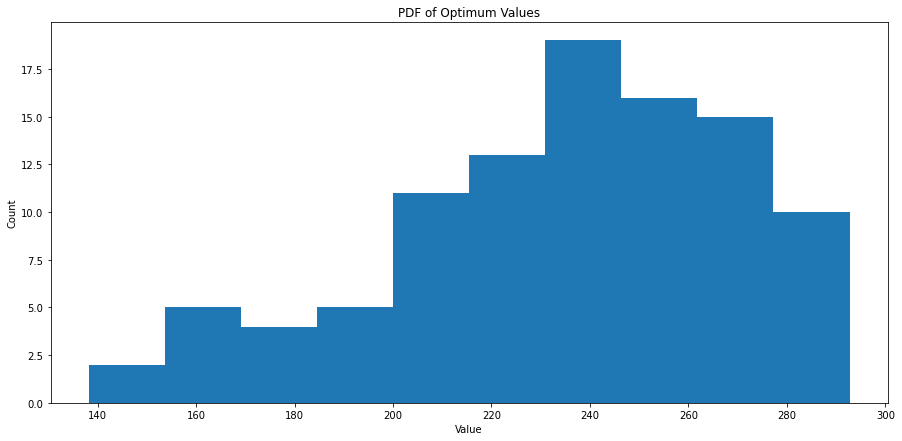

In [8]:
fig, ax = plt.subplots(figsize=(15,7))    
ax.hist(z)
ax.set_title('PDF of Optimum Values')
ax.set_xlabel('Value')
ax.set_ylabel('Count')
plt.show()